# **<span style="color:#287D8EFF">Predicting Customer Conversion</span>**

# <span style="color:#29AF7FFF">Table of Contents</span>

* [INTRODUCTION](#1)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#2)
* [PREPROCESSING & EXPLORATORY DATA ANALYSIS (EDA)](#3)
* [ENCODING SPLITTING, & SCALING](#4)    
* [MODELS](#5)
* [MODEL COMPARISONS](#6)
* [EVALUATING FEATURE IMPORTANCE](#7)
* [CREATE & SAVE FINAL MODEL](#8)
* [PICKLE THE FINAL MODEL](#9)
* [CONCLUSION](#10)

# <span style="color:#29AF7FFF">1. Introduction</span>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287D8EFF">1.1 Information About the Project</span>
This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data. The data was retrieved from www.kaggle.com and is owned by
@misc{rabie_el_kharoua_2024,
	title={📈 Predict Conversion in Digital Marketing Dataset},
	url={https://www.kaggle.com/dsv/8742946},
	DOI={10.34740/KAGGLE/DSV/8742946},
	publisher={Kaggle},
	author={Rabie El Kharoua},
	year={2024}
}

**Objective:**  
The goal of this project will be to predict non-conversion. Non-conversion results when a consumer is not persuaded by marketing campaign material to finalize a purchase. The company is looking to minimize AdSpend lost on unsuccessful campaigns and increase conversion.  

**Scope:**  
This project will focus on identifying the potential for conversion/non-conversion. Conversion takes place when a consumer is influenced by a marketing campaign to finalize a purchase. Exploratory data analysis will focus on identifying any patterns or trends that are associated with conversion/non-conversion. The goal will be to identify weak marketing campaigns to reduce AdSpend loss and increase conversion leading to increased revenue.

## <span style="color:#287D8EFF">1.2 Description of the Dataset</span>
The dataset provides detailed information on customer interactions with various marketing campaigns. The target variable is 'Conversion' where 1 = yes the consumer ultimately finalized a purchase and converted to a paying customer or 0 = no the consumer did not finalize a purchase and thus the digital marketing campaign they were exposed to was unsuccessful.

- **Source:** https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset
- **Size:** There are 8000 observations of 20 variables.
- **Type:** This is tabular data where each row represents an observation and each column represents a feature/variable.

## <span style="color:#287D8EFF">1.3 Description of the Columns</span>


- **Target Variable:**
* 'Conversion' (target) - did the customer convert? after clicking through the ad, was a purchase made? (1=yes, 0=no)

- **Categorical Feature Variables:**
* 'Gender' - customer gender
* 'CampaignChannel' - marketing channel (Referral, PPC (pay per click), Email, SEO (search engine optimization), Social Media)
* 'CampaignType' - type of campaign (Conversion, Awareness, Consideration, Retention)

- **Numerical Feature Variables:**
* 'Age' - customer age
* 'Income' - customer annual income
* 'AdSpend' - cost of ads
* 'ClickThroughRate' - rate at which customer clicked through an ad/ad link
* 'ConversionRate' - rate at which click through led to purchase/signup
* 'WebsiteVisits' - number of website visits
* 'PagesPerVisit' - average pages visited while on website
* 'TimeOnSite' - minutes spent on website
* 'SocialShares' - number of times user shared to social media account
* 'EmailOpens' - number of times customer opened a marketing email
* 'EmailClicks' - number of times customer clicked through a link in an email
* 'PreviousPurchases' - number of previous purchases
* 'LoyaltyPoints' - number of loyalty points
* 'AdvertisingPlatform' - confidential information _(remove)_
* 'AdvertisingTool' - confidential informaiton _(remove)_

- **Other Variables:**
* 'CustomerID' - unique value identifying each customer _(remove as it provides redundant information)_
---



# <span style="color:#29AF7FFF">2. Importing Modules, Load Data & Data Review</span>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

In [1]:
import os
os.getcwd()
os.chdir("C:\\Users\\plw40\\OneDrive\\Documents\\Magnimind\\Portfolio Projects")

In [2]:
# initial loading of packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# establishing format for floats
pd.set_option("display.float", "{:.2f}".format)

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import pickle

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import metrics

In [5]:
# loading dataset
data = pd.read_csv('digital_marketing_campaign_dataset.csv')
data.head().T

,0,1,2,3,4
CustomerID,8000,8001,8002,8003,8004
Age,56,69,46,32,60
Gender,Female,Male,Female,Female,Female
Income,136912,41760,88456,44085,83964
CampaignChannel,Social Media,Email,PPC,PPC,PPC
CampaignType,Awareness,Retention,Awareness,Conversion,Conversion
AdSpend,6497.87,3898.67,1546.43,539.53,1678.04
ClickThroughRate,0.04,0.16,0.28,0.14,0.25
ConversionRate,0.09,0.18,0.08,0.09,0.11
WebsiteVisits,0,42,2,47,0


In [6]:
# get info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.00,11999.50,2309.55,8000.00,9999.75,11999.50,13999.25,15999.00
Age,8000.00,43.63,14.90,18.00,31.00,43.00,56.00,69.00
Income,8000.00,84664.20,37580.39,20014.00,51744.50,84926.50,116815.75,149986.00
AdSpend,8000.00,5000.94,2838.04,100.05,2523.22,5013.44,7407.99,9997.91
ClickThroughRate,8000.00,0.15,0.08,0.01,0.08,0.15,0.23,0.30
ConversionRate,8000.00,0.10,0.05,0.01,0.06,0.10,0.15,0.20
WebsiteVisits,8000.00,24.75,14.31,0.00,13.00,25.00,37.00,49.00
PagesPerVisit,8000.00,5.55,2.61,1.00,3.30,5.53,7.84,10.00
TimeOnSite,8000.00,7.73,4.23,0.50,4.07,7.68,11.48,15.00
SocialShares,8000.00,49.80,28.90,0.00,25.00,50.00,75.00,99.00


# <span style="color:#29AF7FFF">3. Preprocessing and EDA</spam>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287D8EFF">3.1 Data Cleaning</span>
* **Identify Missing Data** are there any missing observations in the dataset?
- **Duplicates:** Remove duplicate records.
- **Inconsistent Formats:** Address inconsistent data formats (e.g., date formats, string casing).
- **Incorrect Data:** Handle obvious data errors (e.g., negative ages or future dates).

In [8]:
data.duplicated().sum()

0

## <span style="color:#287D8EFF">3.2 Missing Value Analysis</span>
Evaluate the dataset for missing values:

- **Percentage of Missing Data:** Identify the percentage of missing data for each feature.
- **Handling Missing Data:** Explain the strategy used to handle missing values (e.g., removal, imputation using mean, median, mode, or more advanced methods).

In [9]:
data.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

## <span style="color:#287D8EFF">3.3 Numerical Data Review</span>
* Identify and handle outliers in the data.
* Plot features using boxplots to visualize outliers and explore patterns.

### <span style="color:#55c667ff">Which variables are numerical in nature?</span>

In [10]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.columns

Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion'],
      dtype='object')

In [11]:
sns.set_palette('viridis')
plt.set_cmap('viridis')

<Figure size 640x480 with 0 Axes>

## <span style="color:#287D8EFF">3.3.1 Column by Column Examination of Numerical Variables</span>

### <span style="color:#55c667ff">CustomerID</span>

In [12]:
# are these all different customers or are there repeat customers in the dataset?
num_uniq_customers = len(pd.unique(data['CustomerID']))
print("Number of customers: ", num_uniq_customers)

Number of customers:  8000


CustomerID does not provide any data that will be useful for our analysis. Since there are 8000 unique CustomerIDs, we can drop this column from the dataframe for further evaluation.

### <span style="color:#55c667ff">Age</span>

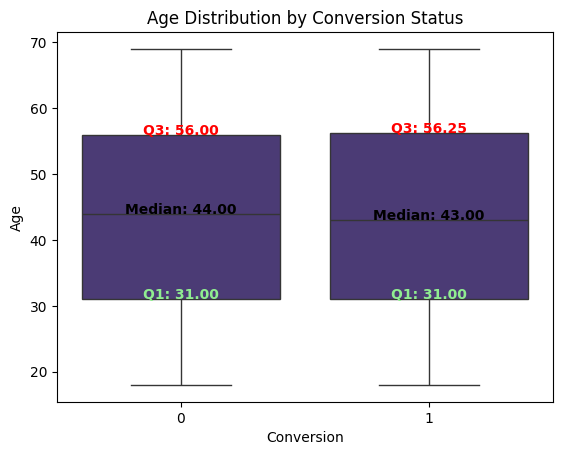

In [13]:
boxplot_age = sns.boxplot(x='Conversion', y='Age', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['Age']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('Age Distribution by Conversion Status')
plt.ylabel('Age')
plt.xlabel('Conversion')
plt.show()

**Age** has no statistical difference among those who result in a conversion versus those who do not. Meaning Age is not a significant indicator of the target variable.

### <span style="color:#55c667ff">Income</span>

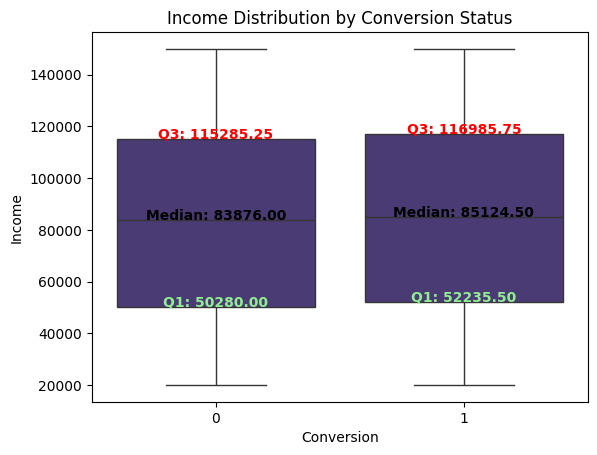

In [14]:
boxplot_income = sns.boxplot(x='Conversion', y='Income', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['Income']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('Income Distribution by Conversion Status')
plt.ylabel('Income')
plt.xlabel('Conversion')
plt.show()

**Income** overall, is slightly higher for those who result in a conversion. However, the difference is minor ranging between just ~$1000-$2000/year difference among the two groups. For this reason, customer income isn't a great indicator of whether or not the customer will result in conversion.

### <span style="color:#55c667ff">AdSpend</span>

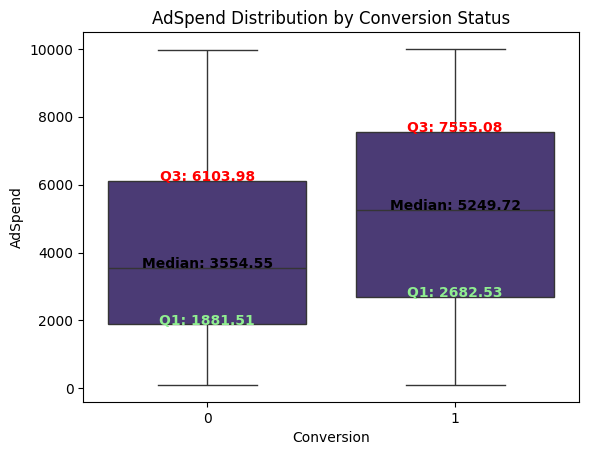

In [15]:
boxplot_adspend = sns.boxplot(x='Conversion', y='AdSpend', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['AdSpend']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('AdSpend Distribution by Conversion Status')
plt.ylabel('AdSpend')
plt.xlabel('Conversion')
plt.show()

**AdSpend** is indicating that as AdSpend increases, so do conversions. Let's look at this a little further with a barplot to see the number of conversions by AdSpend Range.

In [16]:
print(data.AdSpend.max())
print(data.AdSpend.min())

9997.914780944691
100.05481308980612


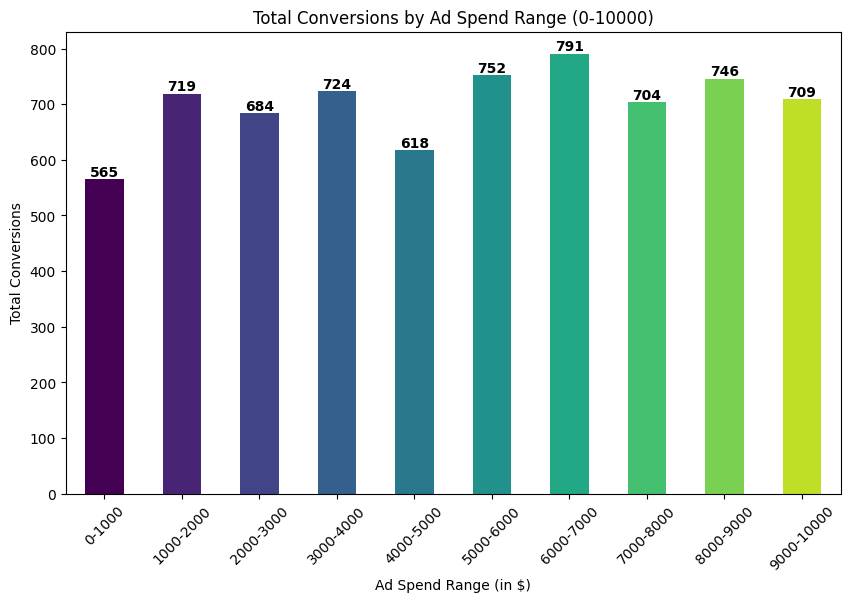

In [17]:
# Define the bins and labels
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000',
          '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000']

# Bin the 'AdSpend' column
data['AdSpend_Binned'] = pd.cut(data['AdSpend'], bins=bins, labels=labels, include_lowest=True)

# Group by the binned 'AdSpend' and calculate the sum of 'Conversion' for each bin
conversion_by_spend = data.groupby('AdSpend_Binned')['Conversion'].sum()

# Plot the relationship between binned ad spend and total conversions
plt.figure(figsize=(10, 6))
conversion_by_spend.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(bins))))

# Customize the plot
for index, value in enumerate(conversion_by_spend):
    plt.text(index, value, str(int(value)), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Total Conversions by Ad Spend Range (0-10000)')
plt.xlabel('Ad Spend Range (in $)')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.show()

This barplot disproves the idea that as AdSpend Increases so does Conversion. We can see that it is relatively random when just considering the two variables of AdSpend and Conversion. It is important to remember that correlation does not equal causation. It is likely that different types of Campaigns and Campaign Channels have varying costs. So, we cannot say for sure that higher AdSpend results in higher Conversion. It is in the best interest of the business to minimize loss on Ad Spend. So, we will look further into ad expenditures in relation to campaign types, channels, and success based on conversion.  

### <span style="color:#55c667ff">ClickThroughRate</span>

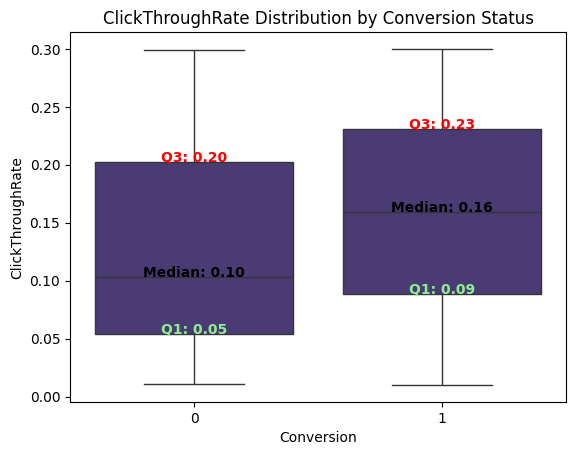

In [18]:
boxplot_clickrate = sns.boxplot(x='Conversion', y='ClickThroughRate', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['ClickThroughRate']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('ClickThroughRate Distribution by Conversion Status')
plt.ylabel('ClickThroughRate')
plt.xlabel('Conversion')
plt.show()

Those customers with a higher click through rate seem to be more likely to result in Conversion.

### <span style="color:#55c667ff">Conversion Rate</span>

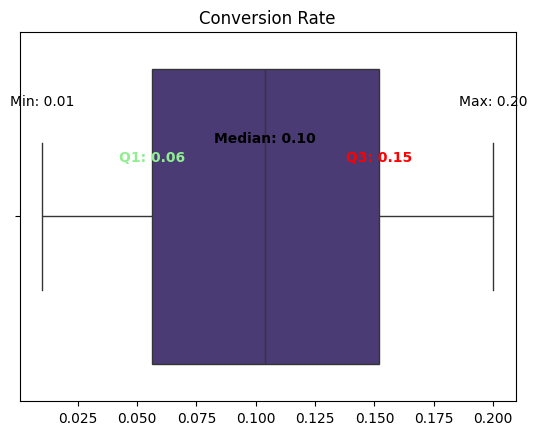

In [19]:
# create boxplt
boxplot_conv_rate = sns.boxplot(x='ConversionRate', data=data)

# calculate values for annotation
median = data['ConversionRate'].median()
q1 = data['ConversionRate'].quantile(0.25)
q3 = data['ConversionRate'].quantile(0.75)
min_value = data["ConversionRate"].min()
max_value = data["ConversionRate"].max()

# add annotations
plt.text(median, -0.2, f"Median: {median:.2f}", horizontalalignment="center", color='black', weight='bold')
plt.text(q1, -0.15, f"Q1: {q1:.2f}", horizontalalignment="center", color='lightgreen', weight='bold')
plt.text(q3, -0.15, f"Q3: {q3:.2f}", horizontalalignment="center", color='red', weight='bold')
plt.text(min_value, -0.3, f"Min: {min_value:.2f}", horizontalalignment="center")
plt.text(max_value, -0.3, f"Max: {max_value:.2f}", horizontalalignment="center")

# display the plot
plt.title('Conversion Rate')
plt.xlabel("")
plt.show()

### <span style="color:#55c667ff">WebsiteVisits</span>

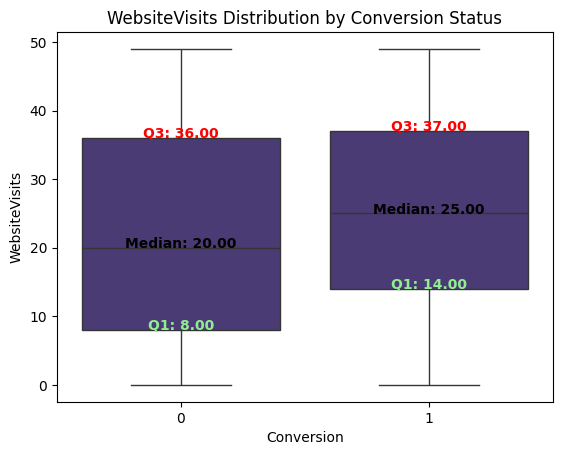

In [20]:
boxplot_visits = sns.boxplot(x='Conversion', y='WebsiteVisits', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['WebsiteVisits']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('WebsiteVisits Distribution by Conversion Status')
plt.ylabel('WebsiteVisits')
plt.xlabel('Conversion')
plt.show()

As we would expect, those customers who have more website visits are more likely to result in Conversion.

### <span style="color:#55c667ff">PagesPerVisit</span>

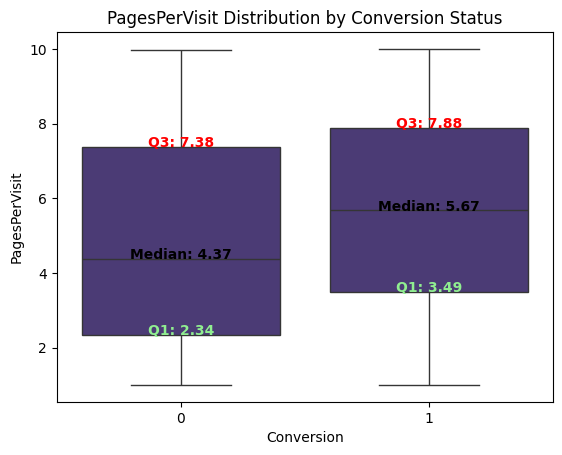

In [21]:
boxplot_ppv = sns.boxplot(x='Conversion', y='PagesPerVisit', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['PagesPerVisit']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('PagesPerVisit Distribution by Conversion Status')
plt.ylabel('PagesPerVisit')
plt.xlabel('Conversion')
plt.show()

Customers which are more likely to purchase/result in conversion are visiting more pages.

### <span style="color:#55c667ff">Time On Site</span>

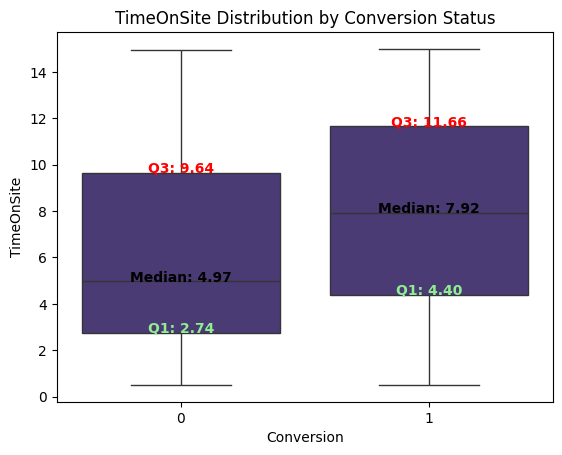

In [22]:
boxplot_time = sns.boxplot(x='Conversion', y='TimeOnSite', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['TimeOnSite']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('TimeOnSite Distribution by Conversion Status')
plt.ylabel('TimeOnSite')
plt.xlabel('Conversion')
plt.show()

There is a verified trend of those within our 'success' group are visiting the site more, viewing more pages, which is resulting in more time spent on the site. This will likely remain the trend as we continue evaluating consumer behavior in relation to thier likelihood to make a purchase.

### <span style="color:#55c667ff">Social Shares</span>

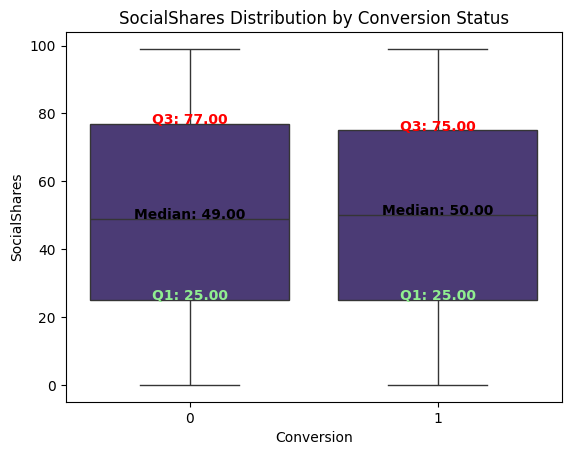

In [23]:
boxplot_shares = sns.boxplot(x='Conversion', y='SocialShares', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['SocialShares']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('SocialShares Distribution by Conversion Status')
plt.ylabel('SocialShares')
plt.xlabel('Conversion')
plt.show()

There is no significant difference here between each group and no outlier values.

### <span style="color:#55c667ff">Email Opens</span>

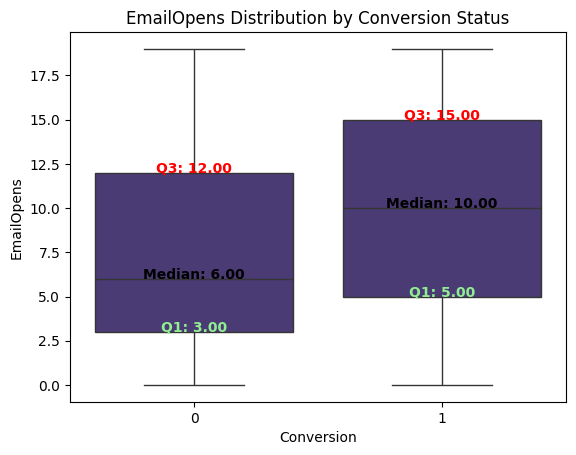

In [24]:
boxplot_email_opens = sns.boxplot(x='Conversion', y='EmailOpens', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['EmailOpens']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('EmailOpens Distribution by Conversion Status')
plt.ylabel('EmailOpens')
plt.xlabel('Conversion')
plt.show()

Our conversion group opens more emails. No outliers found.

### <span style="color:#55c667ff">Email Clicks</span>

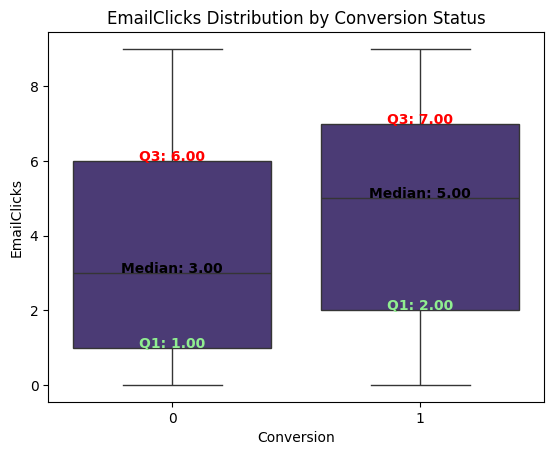

In [25]:
boxplot_email_clicks = sns.boxplot(x='Conversion', y='EmailClicks', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['EmailClicks']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('EmailClicks Distribution by Conversion Status')
plt.ylabel('EmailClicks')
plt.xlabel('Conversion')
plt.show()

Our conversion group clicks through more emails than those who do not convert. There are no obvious outliers within this data.

### <span style="color:#55c667ff">Previous Purchases</span>

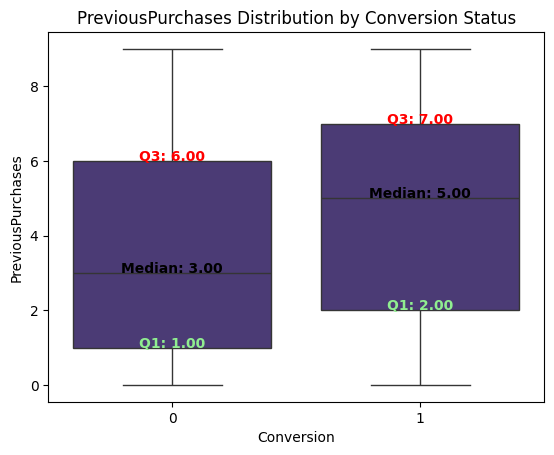

In [26]:
boxplot_prev_pur = sns.boxplot(x='Conversion', y='PreviousPurchases', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['PreviousPurchases']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('PreviousPurchases Distribution by Conversion Status')
plt.ylabel('PreviousPurchases')
plt.xlabel('Conversion')
plt.show()

Those who have previously made purchases are more likely to result in conversion.

### <span style="color:#55c667ff">Loyalty Points</span>

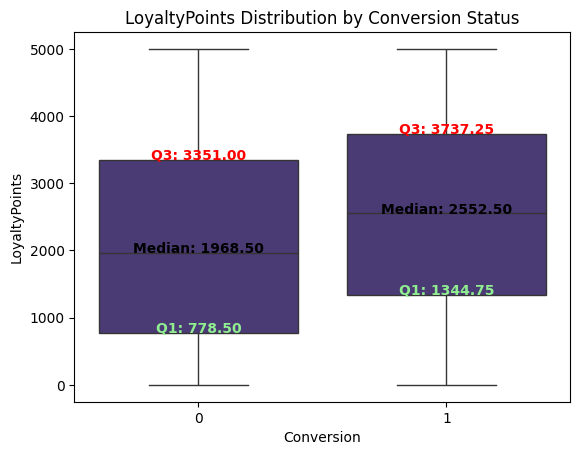

In [27]:
boxplot_loyalty_pts = sns.boxplot(x='Conversion', y='LoyaltyPoints', data=data)

# Calculate quartiles and median for each group (Conversion 0 and 1)
for i, group in enumerate([0, 1]):
    group_data = data[data['Conversion'] == group]['LoyaltyPoints']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)

    # Annotate the boxplot with these statistics
    plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='bold')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='lightgreen', weight='bold')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='red', weight='bold')

# Display the plot
plt.title('LoyaltyPoints Distribution by Conversion Status')
plt.ylabel('LoyaltyPoints')
plt.xlabel('Conversion')
plt.show()

## <span style="color:#287d8eff">Summary Findings Numerical Variables

**Outliers**  
After viewing each numerical variable, there were no obvious outliers found within the data.
* no values that were too high or too low
* no incorrect or missing values
  
**Key Takeaways**  
* Those customers in our Conversion group open more emails, click through more often, visit the website more, view more pages, and stay engaged longer. They are not more likely to share via social media. However, it appears that those who have purchased more are more likely to purchase again in the future.
* We will be looking into trends for AdSpend, CampaignType, and CampaignChannel in relation to Conversion to determine if we can maximize the ROI (return on investment for the campaign/ad) or in other words try to minimize loss on AdSpend. With the trend of repeat customers having a higher likelihood of conversion and higher engagement, it is probable that the campaigns geared towards eliciting these actions will be more successful.
* CustomerID column does not provide any useful data and will be dropped before futher analysis.


## <span style="color:#287D8EFF">3.3.2 Categorical Data</span>

In [28]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.columns

Index(['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform',
       'AdvertisingTool'],
      dtype='object')

### <span style="color:#55c667ff">Gender</span>

In [29]:
data['Gender'].value_counts()

Gender
Female    4839
Male      3161
Name: count, dtype: int64

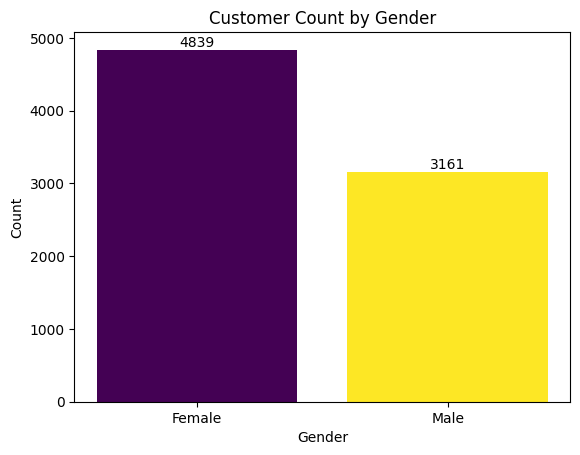

In [30]:
# create counts of genders
gender_counts = data['Gender'].value_counts()

# create bar plot of genders
plt.bar(gender_counts.index, gender_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(gender_counts))))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.bar_label(plt.bar(gender_counts.index, gender_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(gender_counts)))))
plt.title('Customer Count by Gender')
plt.show()

This information lets us know that our primary demographic is female. This leaves us the option to maximize that demographic or we can try to determine if we should increase campaigns targeted towards male consumers to try and increase our male customer base.

### <span style="color:#55c667ff">Campaign Type</span>

In [31]:
data['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

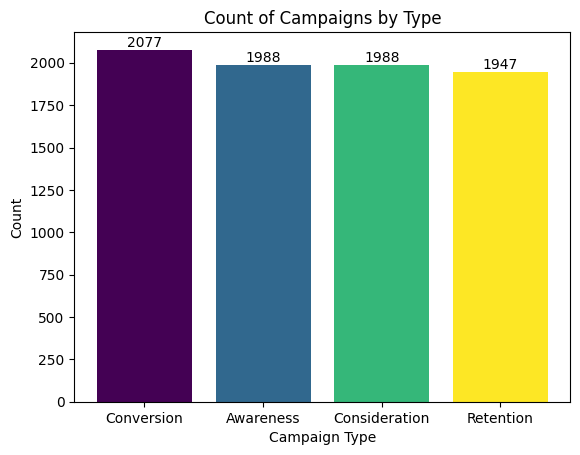

In [32]:
# create counts of CampaignType
campaign_type_count = data['CampaignType'].value_counts()

# create plot of counts for CampaignType
plt.bar(campaign_type_count.index, campaign_type_count.values, color=plt.cm.viridis(np.linspace(0, 1, len(campaign_type_count))))
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.bar_label(plt.bar(campaign_type_count.index, campaign_type_count.values, color=plt.cm.viridis(np.linspace(0, 1, len(campaign_type_count)))))
plt.title('Count of Campaigns by Type')
plt.show()

### <span style="color:#55c667ff">Campaign Channel</span>

In [33]:
data['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

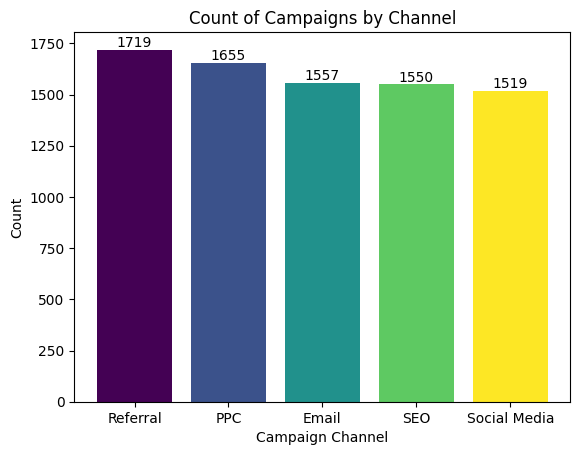

In [34]:
# create counts of Campaign Channel
campaign_channel_count = data['CampaignChannel'].value_counts()

# create plot of counts for Campaign Channel
plt.bar(campaign_channel_count.index, campaign_channel_count.values, color=plt.cm.viridis(np.linspace(0, 1, len(campaign_channel_count))))
plt.xlabel('Campaign Channel')
plt.ylabel('Count')
plt.bar_label(plt.bar(campaign_channel_count.index, campaign_channel_count.values, color=plt.cm.viridis(np.linspace(0, 1, len(campaign_channel_count)))))
plt.title('Count of Campaigns by Channel')
plt.show()

### <span style="color:#55c667ff">Conversion</span>

In [35]:
data['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

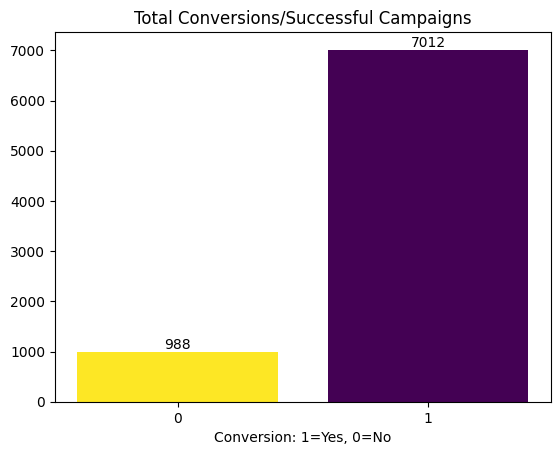

In [36]:
# count of conversions
conversions = data['Conversion'].value_counts()

# create plot of conversion data
plt.bar(conversions.index, conversions.values, color=plt.cm.viridis(np.linspace(0, 1, len(conversions))))
plt.xticks(ticks=[0,1], labels=[0,1])
plt.xlabel('Conversion: 1=Yes, 0=No')
plt.bar_label(plt.bar(conversions.index, conversions.values, color=plt.cm.viridis(np.linspace(0, 1, len(conversions)))))
plt.title('Total Conversions/Successful Campaigns')
plt.show()

In [37]:
data['AdvertisingPlatform'].value_counts()

AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64

In [38]:
data['AdvertisingTool'].value_counts()

AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64

## <span style="color:#287d8eff">Summary of Findings for Categorical Data</span>
* AdvertisingPlatform and AdvertisingTool are both confidential in nature and provide no value to the analysis and will be removed from the dataset.
* Our target variable is extremely imbalanced with a majority of occurences within the Positive Class where Conversion == 1 (yes).


## <span style="color:#287d8eff">3.4 Dropping Columns</span>
'CustomerID', 'AdvertisingPlatform', 'AdvertisingTool' columns provide no value to the dataset and will be dropped.

In [39]:
# removing unneccessary and redundant information columns
remove = ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']
data.drop(remove, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                8000 non-null   int64   
 1   Gender             8000 non-null   object  
 2   Income             8000 non-null   int64   
 3   CampaignChannel    8000 non-null   object  
 4   CampaignType       8000 non-null   object  
 5   AdSpend            8000 non-null   float64 
 6   ClickThroughRate   8000 non-null   float64 
 7   ConversionRate     8000 non-null   float64 
 8   WebsiteVisits      8000 non-null   int64   
 9   PagesPerVisit      8000 non-null   float64 
 10  TimeOnSite         8000 non-null   float64 
 11  SocialShares       8000 non-null   int64   
 12  EmailOpens         8000 non-null   int64   
 13  EmailClicks        8000 non-null   int64   
 14  PreviousPurchases  8000 non-null   int64   
 15  LoyaltyPoints      8000 non-null   int64   
 16  Conver

## <span style="color:#287d8eff">3.5 Multivariate Analysis</span>
* How much AdSpend loss are we incurring on unsuccessful campaigns?
* Which campaigns are costing us the most AdSpend loss?
* Which campaigns are the most successful (having the least amount of AdSpend loss)?

### <span style="color:#55c667ff">3.5.1 AdSpend Analysis  
**AdSpend Loss Visualization and Calculation**

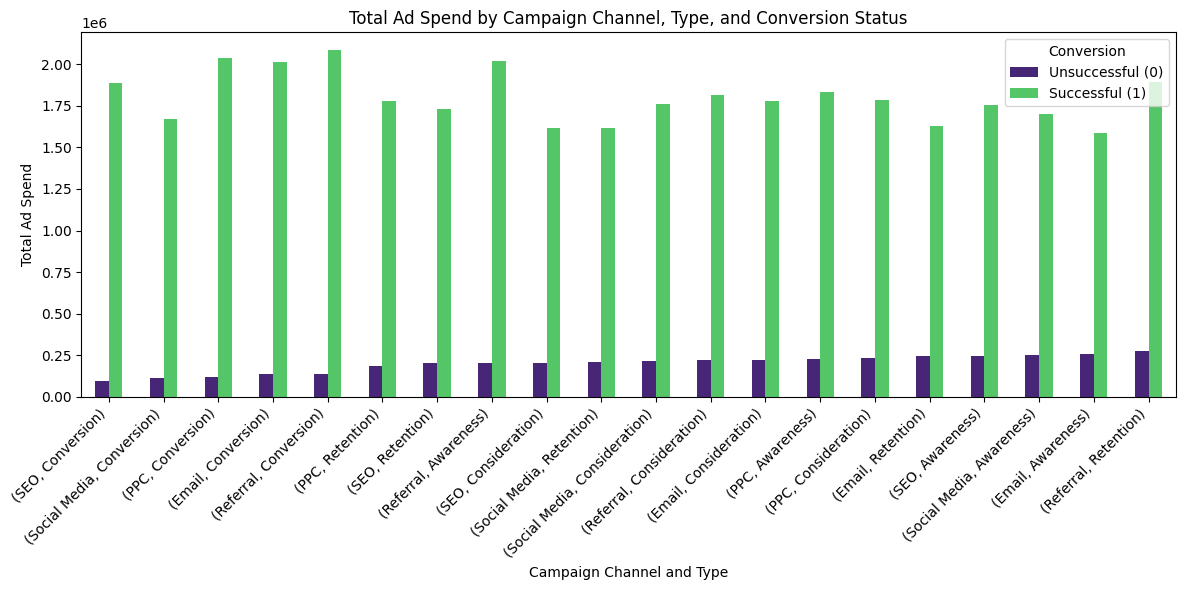

In [40]:
# grouping data
grouped_data = data.groupby(['CampaignChannel', 'CampaignType', 'Conversion'])['AdSpend'].sum().reset_index()

# create pivot_table
pivot_data = grouped_data.pivot_table(values='AdSpend', index=['CampaignChannel', 'CampaignType'], columns='Conversion')

# sort by unsuccessful campaigns where conversion == 0
pivot_data = pivot_data.sort_values(by=0)

# plot the data
pivot_data.plot(kind='bar', figsize=(12, 6), color=['#482677FF', '#55C667FF'])

plt.title('Total Ad Spend by Campaign Channel, Type, and Conversion Status')
plt.ylabel('Total Ad Spend')
plt.xlabel('Campaign Channel and Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Conversion', labels=['Unsuccessful (0)', 'Successful (1)'])
plt.tight_layout()

plt.show()


Here, we can visualize the cost of a successful campaign. Green represents the amount of AdSpend that led to conversion and Dark Purple represents the amount of AdSpend we lost due to no conversion. We can see pretty easily here that 'Awareness' campaigns are the least successful campaign type. While 'Conversion' campaigns are the most successful. I suggest looking into the key differences in these campaign types to determine if features from Conversion can be applied to Awareness to try and increase conversion rate for Awareness campaigns.

In [41]:
# pivot table of conversions by campaign type, channel, and ad spend
pivot1 = pd.pivot_table(data, values='AdSpend', index=['CampaignChannel', 'CampaignType'], columns=['Conversion'], aggfunc='sum')
print(pivot1)

Conversion                            0          1
CampaignChannel CampaignType                      
Email           Awareness     257198.63 1587885.28
                Consideration 223959.41 1778193.34
                Conversion    136010.49 2014677.88
                Retention     246360.56 1627290.25
PPC             Awareness     226015.89 1830775.98
                Consideration 234011.87 1787307.28
                Conversion    121149.33 2036663.68
                Retention     183652.48 1779660.47
Referral        Awareness     203391.33 2016871.37
                Consideration 221894.98 1814804.27
                Conversion    139589.91 2086599.01
                Retention     276632.11 1893735.71
SEO             Awareness     247241.06 1754239.51
                Consideration 206171.58 1618382.90
                Conversion     94301.25 1886539.21
                Retention     201037.87 1732990.48
Social Media    Awareness     251320.58 1702906.19
                Consideration 2

In [42]:
# calculating total loss from unsuccessful ad spends
adspend_loss = round(pivot1.loc[:][0].sum(), 2)
print('Total AdSpend loss: $', adspend_loss)

Total AdSpend loss: $ 4009697.68


In [43]:
# percentage of adspend loss
adspend_perc_loss = round(adspend_loss/sum(data['AdSpend'])*100, 2)
print('Percentage of Total AdSpend lost: ', adspend_perc_loss, "%")

Percentage of Total AdSpend lost:  10.02 %


We are currently losing ~10.02% of our AdSpend on unsuccessful campaigns.

### <span style="color:#55c667ff">What is the AdSpend for for successful and unsuccessful campaigns by channel and type?

In [46]:
adspend_review = data.groupby(['CampaignChannel','CampaignType', 'Conversion'])['AdSpend'].sum()
adspend_review

CampaignChannel  CampaignType   Conversion
Email            Awareness      0             257198.63
                                1            1587885.28
                 Consideration  0             223959.41
                                1            1778193.34
                 Conversion     0             136010.49
                                1            2014677.88
                 Retention      0             246360.56
                                1            1627290.25
PPC              Awareness      0             226015.89
                                1            1830775.98
                 Consideration  0             234011.87
                                1            1787307.28
                 Conversion     0             121149.33
                                1            2036663.68
                 Retention      0             183652.48
                                1            1779660.47
Referral         Awareness      0             203391.33
     

**Identifying the 5 lowest and highest performing Campaigns**

In [47]:
# filter for Conversion == 0
non_conversion_adspend = adspend_review.loc[pd.IndexSlice[:, :, 0]]

# sort by AdSpend in descending order and get the top 5
top_5_non_conversion = non_conversion_adspend.sort_values(ascending=False).head(5)

# Display the result
print('Lowest Performing Campaigns: Highest AdSpend Loss')
print(top_5_non_conversion)

Lowest Performing Campaigns: Highest AdSpend Loss
CampaignChannel  CampaignType
Referral         Retention      276632.11
Email            Awareness      257198.63
Social Media     Awareness      251320.58
SEO              Awareness      247241.06
Email            Retention      246360.56
Name: AdSpend, dtype: float64


In [48]:
# sort by AdSpend in descending order and get the top 5
top_5_min_loss = non_conversion_adspend.sort_values(ascending=True).head(5)

# Display the result
print('Highest Performing Campaigns: Least AdSpend Loss')
print(top_5_min_loss)

Highest Performing Campaigns: Least AdSpend Loss
CampaignChannel  CampaignType
SEO              Conversion      94301.25
Social Media     Conversion     111631.70
PPC              Conversion     121149.33
Email            Conversion     136010.49
Referral         Conversion     139589.91
Name: AdSpend, dtype: float64


Conversion Campaigns on all Campaign Channels are the most successful with least amount of ad spend loss.

## <span style="color:#287d8eff">3.6 Correlation Analysis</span>
Analyze correlations between numerical features

Axes(0.125,0.11;0.62x0.77)


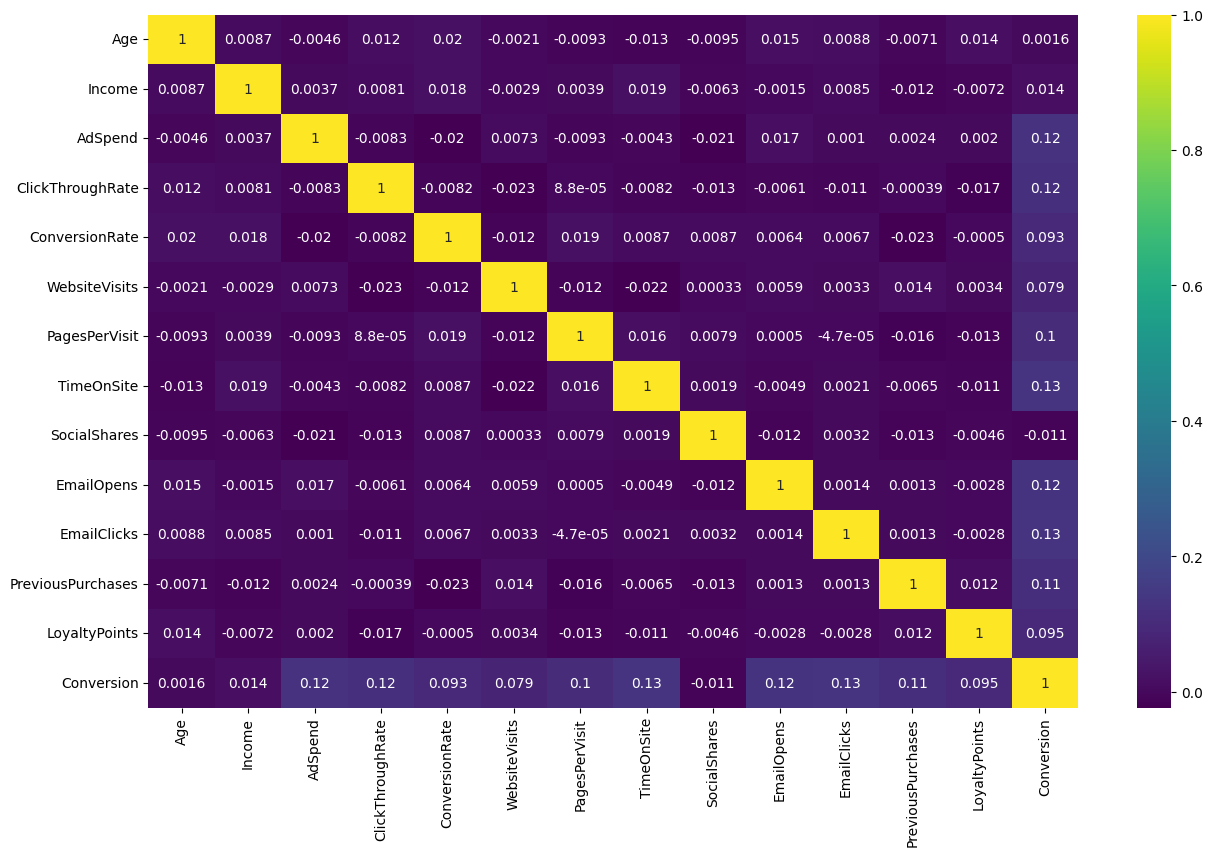

In [49]:
numerical = data.drop(['Gender','CampaignChannel','CampaignType'], axis=1)
plt.figure(figsize=(15,9))
correlation_matrix = sns.heatmap(data.corr(numeric_only=True), cmap="viridis", annot=True)
print(correlation_matrix)

Based on this correlation matrix, there do not seem to be any highly correlated variables.

# <span style="color:#29AF7FFF">4. Encoding, Splitting, and Scaling</span>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287d8eff">4.1 Categorical Variable Encoding</span>
One Hot Encoding of Categorical Variables

In [50]:
# pull only categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# instantiate OneHotEncoder()
encoder = OneHotEncoder(sparse_output=False)

# fit and transform with encoder
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

# create dataframe of encoded data
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# concat scaled numerical data with onehot encoded data
data_encoded = pd.concat([data, one_hot_data], axis=1)

# drop original categorical cols
data_encoded.drop(categorical_columns, axis=1, inplace=True)

# view preproccessed dataframe
print(data_encoded.head())

   Age  Income  AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0   56  136912  6497.87              0.04            0.09              0   
1   69   41760  3898.67              0.16            0.18             42   
2   46   88456  1546.43              0.28            0.08              2   
3   32   44085   539.53              0.14            0.09             47   
4   60   83964  1678.04              0.25            0.11              0   

   PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  ...  Gender_Male  \
0           2.40        7.40            19           6  ...         0.00   
1           2.92        5.35             5           2  ...         1.00   
2           8.22       13.79             0          11  ...         0.00   
3           4.54       14.69            89           2  ...         0.00   
4           2.05       13.99             6           6  ...         0.00   

   CampaignChannel_Email  CampaignChannel_PPC  CampaignChannel_Referral  \
0          

## <span style="color:#287d8eff">4.2 Splitting Data into Train/Test Sets</span>

In [51]:
# Creating X where X is all features
X = data_encoded.drop(['Conversion', 'AdSpend_Binned'], axis=1)

# creating y where y is target variable
y = data_encoded['Conversion']

# creating train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## <span style="color:#287d8eff">4.3 Scaling Data For Modeling</span>

In [52]:
# instantiate standard scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <span style="color:#29AF7FFF">5. Models</span>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287d8eff">5.1 Creating Model Evaluation Functions</span>
Model performance will be evaluated using F1 and AUC scores. The dataset is highly imbalanced with Conversion == 1 being the dominant class. In order to accurately predict non-conversions (the minority class) we need a good balance of precision and recall. F1 will provide this balance while AUC will provide an addition metric for model comparison. The model which provides the best of both F1 and AUC will be the best model.

In [53]:
# Evaluating and Comparing Train vs. Test Results
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    cm_test = confusion_matrix(y_test, y_pred)
    print(cm_test)
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    cm_train = confusion_matrix(y_train, y_train_pred)
    print(cm_train)
    print("classification_report")
    print(classification_report(y_train, y_train_pred))

In [54]:
# Plot Train and Test Confusion Matrices for Comparison
def plot_confusion_matrices(cm1, cm2, labels, titles):

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels)
    disp1.plot(ax=axs[0])
    axs[0].set_title(titles[0])

    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
    disp2.plot(ax=axs[1])
    axs[1].set_title(titles[1])

    plt.tight_layout()
    plt.show()

In [55]:
# Creating a DataFrame holding Evaluation Results for each model
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    try:
        y_pred_proba = model.predict_proba(X_test)[:,1]
    except AttributeError:
        y_pred_proba = None

    scores = {name: {"accuracy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),
    "f1" : f1_score(y_test,y_pred),
    "auc": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
    "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
    "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

## <span style="color:#287d8eff">5.2 Creating Models and Fine Tuning</span>
Since the dataset is highly imbalanced, the parameter 'class_weight' will be set to 'balanced' to prevent bias toward the dominant class.

## <span style="color:#287d8eff">5.2.1 Logistic Regression</span>
### <span style="color:#55c667ff">Logistic Regression (default parameters)

In [56]:
# initialize LogisticRegression()
lr = LogisticRegression(class_weight='balanced', random_state=42) # 'balanced' is used to prevent biased toward positive class
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

# evaluate results
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f'AUC score: {auc_lr: .2f}')

f1_lr = f1_score(y_test, y_pred_lr)
print(f'F1 score: {f1_lr: .2f}')

AUC score:  0.78
F1 score:  0.84


In [57]:
eval_metric(lr, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 145   53]
 [ 341 1061]]
classification_report
              precision    recall  f1-score   support

           0       0.30      0.73      0.42       198
           1       0.95      0.76      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.63      0.74      0.63      1600
weighted avg       0.87      0.75      0.79      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 574  216]
 [1563 4047]]
classification_report
              precision    recall  f1-score   support

           0       0.27      0.73      0.39       790
           1       0.95      0.72      0.82      5610

    accuracy                           0.72      6400
   macro avg       0.61      0.72      0.61      6400
weighted avg       0.87      0.72      0.77      6400



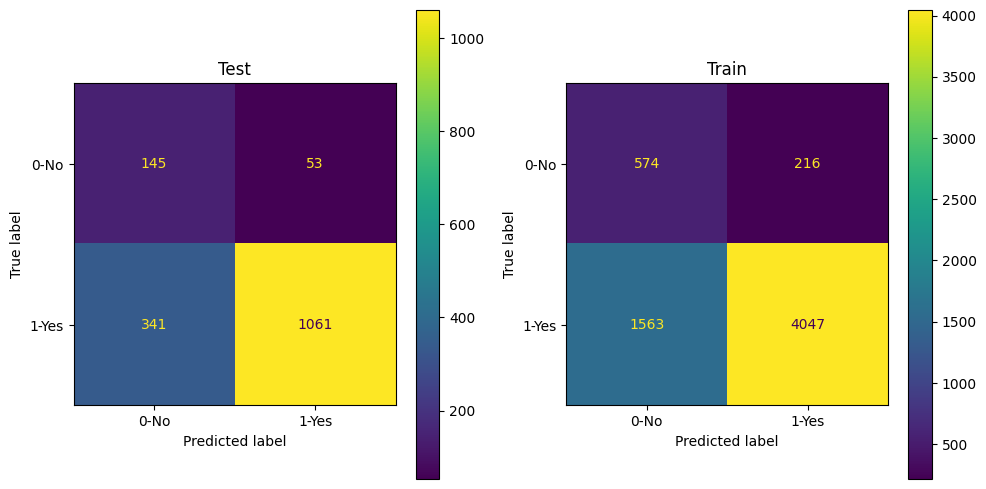

In [58]:
# create confusion matrices for test and train data
y_train_pred = lr.predict(X_train_scaled)

cm_test = confusion_matrix(y_test, y_pred_lr)

cm_train = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Test', 'Train'])

In [59]:
# Storing model results in a dataframe for final evaluation of all models
scores_df = metric_df(lr, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")

scores_df

,Logistic Regression
accuracy,0.75
precision,0.95
recall,0.76
f1,0.84
auc,0.78
True Negative Rate,0.09
False Positive Rate,0.03
False Negative Rate,0.21
True Positive Rate,0.66


**Logistic Regression** has moderate quality in predicting Conversion with an F1 of 0.84 and AUC of 0.78. We will now try tuning some parameters to see if we can increase F1 and AUC scores.

### <span style="color:#55c667ff">Logistic Regression with GridSearchCV for Hyperparameter tuning

In [60]:
# create grid of hyperparameters for model tuning
grid = [
    {'penalty':['l1','l2'],
     'C': np.logspace(-4,4,20),
     'solver': ['lbfgs', 'liblinear'],
     'max_iter': [100, 500, 1000],
     'class_weight':['balanced']
    }
]

# initialize GridSearchCV using grid of parameters
lr_clf = GridSearchCV(lr, param_grid= grid)

# find best clf
best_clf = lr_clf.fit(X_train_scaled, y_train)

best_clf.best_params_

{'C': 1.623776739188721,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [61]:
# creating model using best estimators from GridSearchCV Results
lr2 = LogisticRegression(C=1.62, class_weight='balanced', max_iter=100, penalty='l2', solver='lbfgs', random_state=42)

lr2.fit(X_train_scaled, y_train)

LogisticRegression(C=1.62, class_weight='balanced', random_state=42)

In [62]:
# predict and predict proba
y_pred = lr2.predict(X_test_scaled)
y_pred_proba = lr2.predict_proba(X_test_scaled)[:,1]

# evaluate results
auc_lr2 = round(roc_auc_score(y_test, y_pred_proba),2)
print(f'AUC score: {auc_lr2: .2f}')

f1_lr2 = round(f1_score(y_test, y_pred),2)
print(f'F1 score: {f1_lr2: .2f}')

AUC score:  0.78
F1 score:  0.84


In [63]:
# Model Evaluation
eval_metric(lr2, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 145   53]
 [ 341 1061]]
classification_report
              precision    recall  f1-score   support

           0       0.30      0.73      0.42       198
           1       0.95      0.76      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.63      0.74      0.63      1600
weighted avg       0.87      0.75      0.79      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 574  216]
 [1563 4047]]
classification_report
              precision    recall  f1-score   support

           0       0.27      0.73      0.39       790
           1       0.95      0.72      0.82      5610

    accuracy                           0.72      6400
   macro avg       0.61      0.72      0.61      6400
weighted avg       0.87      0.72      0.77      6400



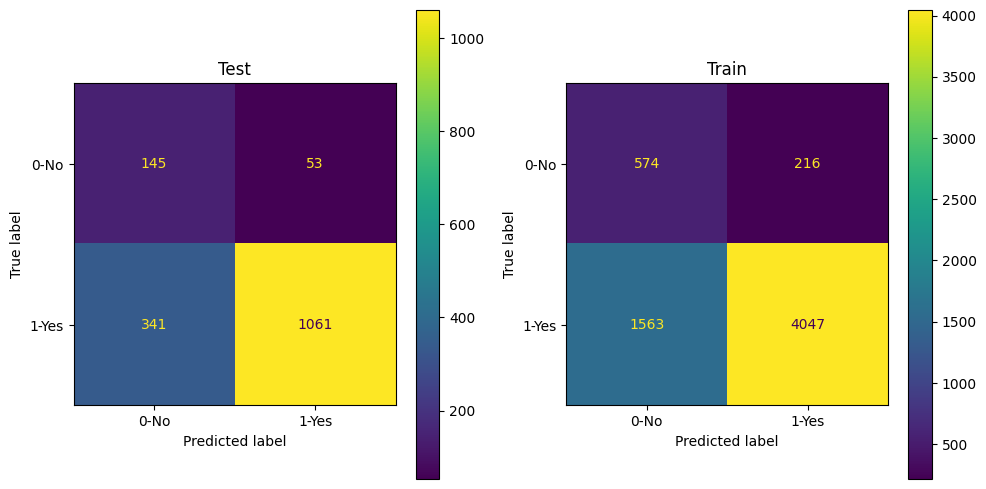

In [64]:
# create confusion matrices for test and train data
y_train_pred = lr2.predict(X_train_scaled)

cm_test = confusion_matrix(y_test, y_pred)

cm_train = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Test', 'Train'])

Since model results in the same outcome, these results will not be added to the results dataframe.

## <span style="color:#287d8eff">Logistic Regression Model Comparison and Summary </span> 
Both the simple and fine-tuned Logistic Regression model return the same results. Therefore, we will use the simple Logistic Regression model and try to get better results with different models.

## <span style="color:#287d8eff">5.2.2 K-Nearest Neighbors</span>

### <span style="color:#55c667ff">KNN with default parameters</span>

In [65]:
# creating and fitting model with default parameters
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:,1]

# evaluate results
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f'AUC score: {auc_knn: .2f}')

f1_knn = f1_score(y_test, y_pred_knn)
print(f'F1 score: {f1_knn: .2f}')

AUC score:  0.59
F1 score:  0.93


In [66]:
# Model Evaluation
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[   8  190]
 [   9 1393]]
classification_report
              precision    recall  f1-score   support

           0       0.47      0.04      0.07       198
           1       0.88      0.99      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.68      0.52      0.50      1600
weighted avg       0.83      0.88      0.83      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 110  680]
 [  14 5596]]
classification_report
              precision    recall  f1-score   support

           0       0.89      0.14      0.24       790
           1       0.89      1.00      0.94      5610

    accuracy                           0.89      6400
   macro avg       0.89      0.57      0.59      6400
weighted avg       0.89      0.89      0.86      6400



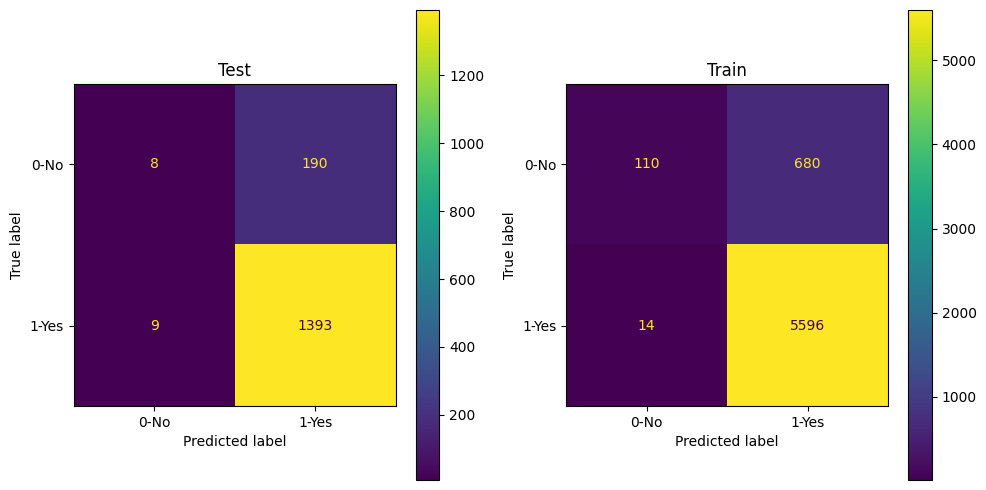

In [67]:
# create confusion matrices for test and train data
y_train_pred = knn.predict(X_train_scaled)

cm_test = confusion_matrix(y_test, y_pred_knn)

cm_train = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Test', 'Train'])

In [68]:
# Storing model results in a dataframe for final evaluation of all models
scores_df2 = metric_df(knn, X_train_scaled, y_train, X_test_scaled, y_test, "KNN")

scores_df = pd.concat([scores_df, scores_df2], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN
accuracy,0.75,0.88
precision,0.95,0.88
recall,0.76,0.99
f1,0.84,0.93
auc,0.78,0.59
True Negative Rate,0.09,0.01
False Positive Rate,0.03,0.12
False Negative Rate,0.21,0.01
True Positive Rate,0.66,0.87


Default parameters for KNN are not performing as well as Logistic Regression with a slightly lower F1 score but a significantly lower AUC. We want a model that can differentiate between classes and does not just simply default to the more predominant class (1). So, we need to have a higher AUC for predicting new occurences. This can be a challenge with imbalanced data.

### <span style="color:#55c667ff"> K-Nearest Neighbors with GridSearchCV </span>

Before using GridSearchCV, the elbow method will be used to evaluate various values of K.

In [69]:
error_rate = []
# Will take some time
for i in range(1,15):

 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

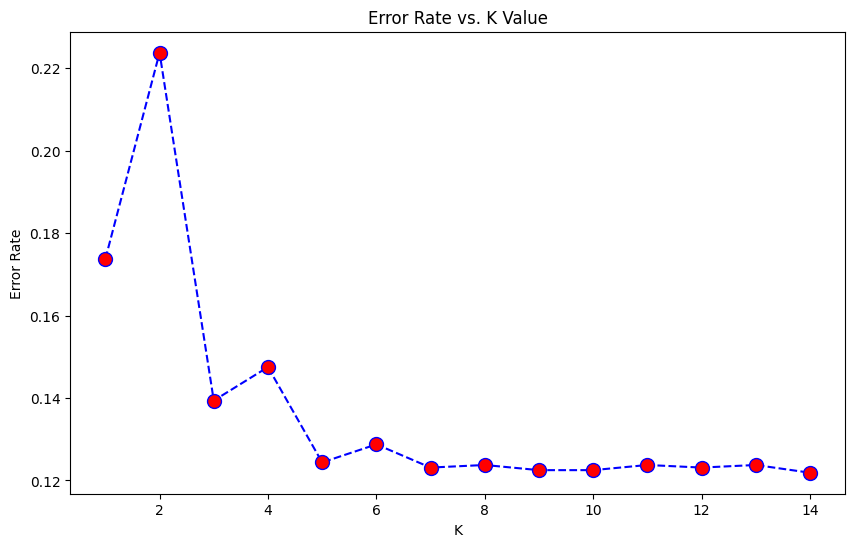

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In order to prevent overfitting, we will use 7 neighbors because after 7 neighbors the error rate starts to flatten out with no significant reduction. Therefore it is best to use less neighbors to avoid overfitting.

In [71]:
knn_grid = { 'n_neighbors' : [5, 7],
               'weights' : ['uniform','distance', 'balanced'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_clf = GridSearchCV(knn, param_grid=knn_grid, verbose=1, cv=3)

knn_clf.fit(X_train_scaled, y_train)

knn_clf.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [72]:
# building model utilizing best parameters
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors= 7, weights= 'distance')

knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [73]:
y_pred_knn2 = knn_best.predict(X_test_scaled)
y_pred_proba_knn2 = knn_best.predict_proba(X_test_scaled)[:,1]

# evaluate results
auc_knn2 = roc_auc_score(y_test, y_pred_proba_knn2)
print(f'AUC score: {auc_knn2: .2f}')


f1_knn2 = f1_score(y_test, y_pred_knn2)
print(f'F1 score: {f1_knn2: .2f}')


AUC score:  0.63
F1 score:  0.93


With the addition of some fine tuning, we see a slight increase in AUC from 0.58 to 0.63. However, the KNN Model is underperforming in comparison to the Logistic Regression model.

In [74]:
# Model Evaluation
eval_metric(knn_best, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[   5  193]
 [   8 1394]]
classification_report
              precision    recall  f1-score   support

           0       0.38      0.03      0.05       198
           1       0.88      0.99      0.93      1402

    accuracy                           0.87      1600
   macro avg       0.63      0.51      0.49      1600
weighted avg       0.82      0.87      0.82      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 790    0]
 [   0 5610]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       1.00      1.00      1.00      5610

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



The KNN Model using the best parameters from our GridSearchCV is overfitting with 100% accuracy for training data and just 87% for the test set. I will adjust the model to 5 neighbors and try uniform weights to see if we can fix the overfitting problem and get better model results than with default parameters.

### <span style="color:#55c667ff">KNN Model with Fine Tuning (to remedy overfitting)</span>

In [75]:
# KNN with Manual Fine Tuning
knn3 = KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights= 'uniform')

knn3.fit(X_train_scaled, y_train)

# auc and f1 scores
y_pred_knn3 = knn3.predict(X_test_scaled)
y_pred_proba_knn3 = knn3.predict_proba(X_test_scaled)[:,1]

# evaluate results
auc_knn3 = roc_auc_score(y_test, y_pred_proba_knn3)
print(f'AUC score: {auc_knn3: .2f}')


f1_knn3 = f1_score(y_test, y_pred_knn3)
print(f'F1 score: {f1_knn3: .2f}')

AUC score:  0.59
F1 score:  0.93


In [76]:
# Model Evaluation
eval_metric(knn3, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[   9  189]
 [  13 1389]]
classification_report
              precision    recall  f1-score   support

           0       0.41      0.05      0.08       198
           1       0.88      0.99      0.93      1402

    accuracy                           0.87      1600
   macro avg       0.64      0.52      0.51      1600
weighted avg       0.82      0.87      0.83      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 137  653]
 [  24 5586]]
classification_report
              precision    recall  f1-score   support

           0       0.85      0.17      0.29       790
           1       0.90      1.00      0.94      5610

    accuracy                           0.89      6400
   macro avg       0.87      0.58      0.62      6400
weighted avg       0.89      0.89      0.86      6400



Changing neighbors from 7 to 5 and weights from distance to uniform fixed the overfitting problem. However, changing these parameters does not improve the model. We end up with the same results as our default model. Therefore, we will keep the default model results which have already been added to the 'scores_df' for final review.

## <span style="color:#287d8eff">KNN Model Comparison and Summary</span>
**K-Nearest Neighbors** does not perform as well as the logistic regression model. The AUC dropped significantly with KNN meaning this model has a difficult time distinguishing between our classes. While we can easily predict our Conversion cases we are not doing well at predicting non-conversion class. Tuning parameters using GridSearchCV resulted in slightly better results. However, the best model we have thus far is still the Logistic Regression Model.

## <span style="color:#287d8eff">5.2.3 SVM - Support Vector Machine</span>

### <span style="color:#55c667ff">SVM with default parameters</span>

In [77]:
svm = SVC(class_weight='balanced', random_state=42)

svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

# evaluate results
f1_svm = f1_score(y_test, y_pred_svm)
print(f'F1 score: {f1_knn3: .2f}')

F1 score:  0.93


In [78]:
# Model Evaluation
eval_metric(svm, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 119   79]
 [ 182 1220]]
classification_report
              precision    recall  f1-score   support

           0       0.40      0.60      0.48       198
           1       0.94      0.87      0.90      1402

    accuracy                           0.84      1600
   macro avg       0.67      0.74      0.69      1600
weighted avg       0.87      0.84      0.85      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 681  109]
 [ 564 5046]]
classification_report
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       790
           1       0.98      0.90      0.94      5610

    accuracy                           0.89      6400
   macro avg       0.76      0.88      0.80      6400
weighted avg       0.93      0.89      0.90      6400



SVM is returning similar results as our previous models. We will try to improve upon these results with some parameter tuning.

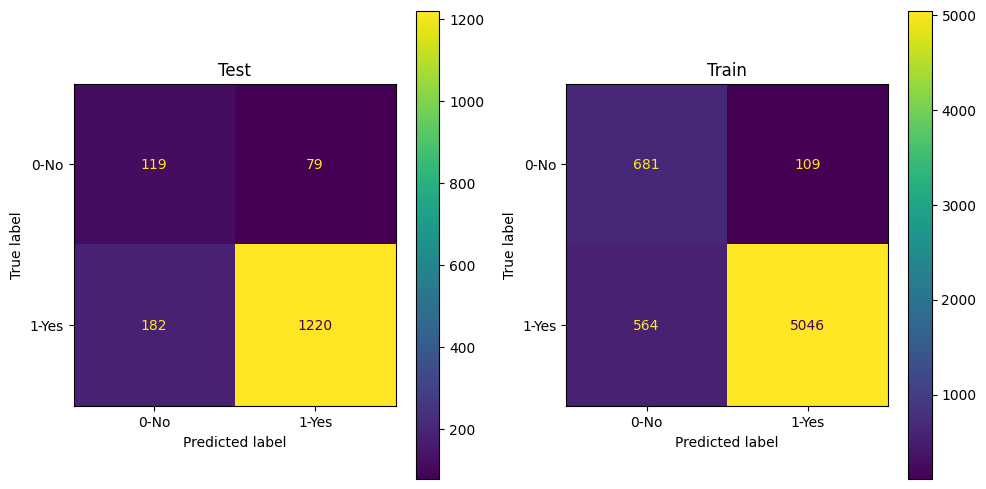

In [79]:
# create confusion matrices for test and train data
y_pred = svm.predict(X_test_scaled)

y_train_pred = svm.predict(X_train_scaled)

cm_test = confusion_matrix(y_test, y_pred)

cm_train = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Test', 'Train'])

### <span style="color:#55c667ff">SVM with GridSearchCV</span>

In [80]:
svm_grid = {'C': [1, 10, 100],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

svm_clf = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid=svm_grid, n_jobs=-1)

svm_fit = svm_clf.fit(X_train_scaled, y_train)

svm_fit.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [81]:
# SVM with best parameters
svm_best = SVC(class_weight='balanced', C= 100, gamma=0.1, kernel='rbf', random_state=42)

svm_best.fit(X_train_scaled, y_train)

SVC(C=100, class_weight='balanced', gamma=0.1, random_state=42)

In [82]:
# Model Evaluation
eval_metric(svm_best, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  35  163]
 [  50 1352]]
classification_report
              precision    recall  f1-score   support

           0       0.41      0.18      0.25       198
           1       0.89      0.96      0.93      1402

    accuracy                           0.87      1600
   macro avg       0.65      0.57      0.59      1600
weighted avg       0.83      0.87      0.84      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 790    0]
 [   0 5610]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       1.00      1.00      1.00      5610

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



Best parameters returns the the highest value of 'C' as best. We can see that this leads to overfitting. So, we will lower the C value and run the model again to see if we can fix our overfitting problem. Since we are sitting at the upper bounds provided to the grid search on C and at the lower bounds for 'gamma', it is best to try a few additional options for these parameters to ensure we have found the best model.

### <span style="color:#55c667ff">SVM with Manual Tuning</span>

In [83]:
# SVM with c= 200 and gamma = 0.1
svm2 = SVC(class_weight='balanced', C= 50, gamma=0.01, kernel='rbf', random_state=42)

svm2.fit(X_train_scaled, y_train)

SVC(C=50, class_weight='balanced', gamma=0.01, random_state=42)

In [84]:
# Model Evaluation
eval_metric(svm2, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 121   77]
 [ 207 1195]]
classification_report
              precision    recall  f1-score   support

           0       0.37      0.61      0.46       198
           1       0.94      0.85      0.89      1402

    accuracy                           0.82      1600
   macro avg       0.65      0.73      0.68      1600
weighted avg       0.87      0.82      0.84      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 698   92]
 [ 587 5023]]
classification_report
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       790
           1       0.98      0.90      0.94      5610

    accuracy                           0.89      6400
   macro avg       0.76      0.89      0.80      6400
weighted avg       0.93      0.89      0.90      6400



The first SVM Model is still outperforming our tuned model. I will try a few more parameters for comparison.

In [85]:
# SVM with c= 25 and gamma = 0.01
svm3 = SVC(class_weight='balanced', C= 25, gamma=0.01, kernel='rbf', random_state=42)

svm3.fit(X_train_scaled, y_train)

eval_metric(svm3, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 121   77]
 [ 204 1198]]
classification_report
              precision    recall  f1-score   support

           0       0.37      0.61      0.46       198
           1       0.94      0.85      0.90      1402

    accuracy                           0.82      1600
   macro avg       0.66      0.73      0.68      1600
weighted avg       0.87      0.82      0.84      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 667  123]
 [ 652 4958]]
classification_report
              precision    recall  f1-score   support

           0       0.51      0.84      0.63       790
           1       0.98      0.88      0.93      5610

    accuracy                           0.88      6400
   macro avg       0.74      0.86      0.78      6400
weighted avg       0.92      0.88      0.89      6400



After trying C values of: 50, 100, 150, 200 with gamma of: 0.1 and 0.01, default model still out performs all other models without overfitting. For this reason, we will add the scores from the first SVM model to the scores_df.

In [86]:
# Storing model results in a dataframe for final evaluation of all models
scores_df3 = metric_df(svm, X_train_scaled, y_train, X_test_scaled, y_test, "SVM")

scores_df = pd.concat([scores_df, scores_df3], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM
accuracy,0.75,0.88,0.84
precision,0.95,0.88,0.94
recall,0.76,0.99,0.87
f1,0.84,0.93,0.90
auc,0.78,0.59,NaN
True Negative Rate,0.09,0.01,0.07
False Positive Rate,0.03,0.12,0.05
False Negative Rate,0.21,0.01,0.11
True Positive Rate,0.66,0.87,0.76


## <span style="color:#287d8eff">5.2.4 Random Forest</span>

### <span style="color:#55c667ff">Random Forest w/ default parameters

In [87]:
# initialize RandomForestClassifier()
rf = RandomForestClassifier(class_weight='balanced', random_state=42) # 'balanced' is used to prevent bias toward positive class
rf.fit(X_train, y_train) # scaled data is not necessary for random forest

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]

# evaluate results
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'AUC score: {auc_rf: .2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1 score: {f1_rf: .2f}')

AUC score:  0.81
F1 score:  0.94


Random Forest is resulting in our best results yet. AUC has improved drastically while F1 remains high. Let's try to improve with a GridSearchCV for best parameters.

### <span style="color:#55c667ff">Random Forest with GridSearchCV

In [88]:
rf_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [6, 8, 10],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(rf, param_grid=rf_grid,n_jobs=-1)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}

In [89]:
# fit with best params
rf_best = RandomForestClassifier(class_weight='balanced', random_state=42, criterion='gini', max_depth= 8, n_estimators=100)

rf_best.fit(X_train, y_train)

eval_metric(rf_best, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  91  107]
 [  34 1368]]
classification_report
              precision    recall  f1-score   support

           0       0.73      0.46      0.56       198
           1       0.93      0.98      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.83      0.72      0.76      1600
weighted avg       0.90      0.91      0.90      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 624  166]
 [  59 5551]]
classification_report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       790
           1       0.97      0.99      0.98      5610

    accuracy                           0.96      6400
   macro avg       0.94      0.89      0.91      6400
weighted avg       0.96      0.96      0.96      6400



In [90]:
# y pred and y pred proba calculations
y_pred_rf_best = rf_best.predict(X_test)

y_pred_proba_rf_best = rf_best.predict_proba(X_test)[:,1]

In [91]:
# F1 and AUC for grid model
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'AUC score: {auc_rf: .2f}')

f1_rf = round(f1_score(y_test, y_pred_rf),2)
print(f'F1 score: {f1_rf: .2f} ')

AUC score:  0.81
F1 score:  0.94 


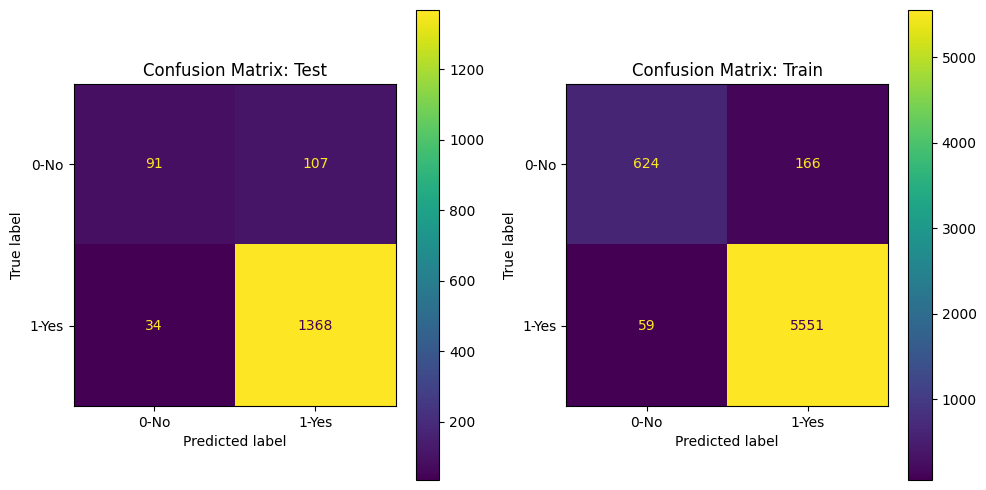

In [92]:
# create confusion matrices and plot using function
cm_test = confusion_matrix(y_test, y_pred_rf_best)

y_pred_train_rf_best = rf_best.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train_rf_best)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Confusion Matrix: Test', 'Confusion Matrix: Train'])

The **Random Forest** model has the highest scores yet with a F1 of 0.94 and AUC of 0.81 this model is able to differentiate between classes and generalize well enough to return highly accurate predicitions. This model will be saved to the scores_df for final review.

In [93]:
# Storing model results in a dataframe for final evaluation of all models
scores_df4 = metric_df(rf_best, X_train, y_train, X_test, y_test, "Random Forest")

scores_df = pd.concat([scores_df, scores_df4], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM,Random Forest
accuracy,0.75,0.88,0.84,0.91
precision,0.95,0.88,0.94,0.93
recall,0.76,0.99,0.87,0.98
f1,0.84,0.93,0.90,0.95
auc,0.78,0.59,NaN,0.81
True Negative Rate,0.09,0.01,0.07,0.06
False Positive Rate,0.03,0.12,0.05,0.07
False Negative Rate,0.21,0.01,0.11,0.02
True Positive Rate,0.66,0.87,0.76,0.85


## <span style="color:#287d8eff">5.2.5 AdaBoost</span>

### <span style="color:#55c667ff">AdaBoost w/ default parameters</span>

In [94]:
# initialize AdaBoostClassifier()
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)
y_pred_proba_abc = abc.predict_proba(X_test)[:,1]

# evaluate results
auc_abc = roc_auc_score(y_test, y_pred_proba_abc)
print(f'AUC score: {auc_abc: .2f}')

f1_abc = f1_score(y_test, y_pred_abc)
print(f'F1 score: {f1_abc: .2f} ')

AUC score:  0.81
F1 score:  0.95 


In [95]:
eval_metric(abc, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  55  143]
 [   7 1395]]
classification_report
              precision    recall  f1-score   support

           0       0.89      0.28      0.42       198
           1       0.91      1.00      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.90      0.64      0.69      1600
weighted avg       0.90      0.91      0.88      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 266  524]
 [  14 5596]]
classification_report
              precision    recall  f1-score   support

           0       0.95      0.34      0.50       790
           1       0.91      1.00      0.95      5610

    accuracy                           0.92      6400
   macro avg       0.93      0.67      0.73      6400
weighted avg       0.92      0.92      0.90      6400



### <span style="color:#55c667ff">AdaBoost with GridSearchCV</span>

In [96]:
# param grid
abc_grid = {
    'n_estimators': [10, 20, 50, 100, 150],
    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1.0],
}

abc_clf = GridSearchCV(abc, param_grid=abc_grid, n_jobs=-1)

abc_clf.fit(X_train, y_train)

abc_clf.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

The GridSearchCV is returning a learning_rate of 1 and n_estimators of 50. These are the default parameters which we already ran in the initial AdaBoost model. So, instead, I will adjust the parameters manually to determine if we can increase the model scores.

### <span style="color:#55c667ff">AdaBoost with Manual Tuning</span>

In [97]:
abc2 = AdaBoostClassifier(learning_rate= 0.97, n_estimators= 30, random_state=42)

abc2.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.97, n_estimators=30, random_state=42)

In [98]:
# y pred and y pred proba calculations
y_pred_abc = abc2.predict(X_test)

y_pred_proba_abc = abc2.predict_proba(X_test)[:,1]

In [99]:
# F1 and AUC for grid model
auc_abc = roc_auc_score(y_test, y_pred_proba_abc)
print(f'AUC score: {auc_abc: .2f}')

f1_abc = f1_score(y_test, y_pred_abc)
print(f'F1 score: {f1_abc: .2f}')

AUC score:  0.82
F1 score:  0.95


In [100]:
eval_metric(abc2, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  47  151]
 [   8 1394]]
classification_report
              precision    recall  f1-score   support

           0       0.85      0.24      0.37       198
           1       0.90      0.99      0.95      1402

    accuracy                           0.90      1600
   macro avg       0.88      0.62      0.66      1600
weighted avg       0.90      0.90      0.87      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 267  523]
 [  11 5599]]
classification_report
              precision    recall  f1-score   support

           0       0.96      0.34      0.50       790
           1       0.91      1.00      0.95      5610

    accuracy                           0.92      6400
   macro avg       0.94      0.67      0.73      6400
weighted avg       0.92      0.92      0.90      6400



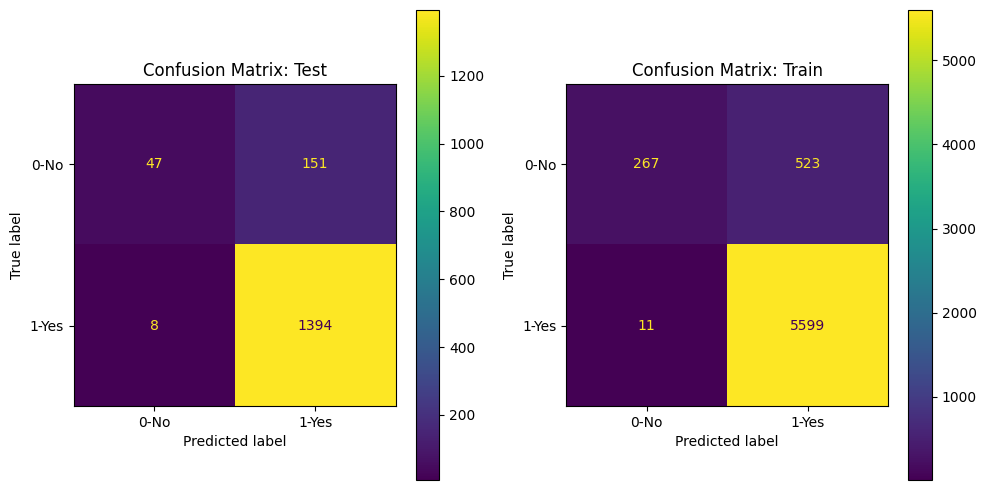

In [101]:
# create confusion matrices and plot using function
cm_test = confusion_matrix(y_test, y_pred_abc)

y_pred_train_abc = abc2.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train_abc)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Confusion Matrix: Test', 'Confusion Matrix: Train'])

**AdaBoost** is performing similarly to the Random Forest Model. The best model was the model with manually tuned parameters with learning_rate = 0.97 and n_estimators = 30. The scores will be added to the scores_df for final review. Although the AUC for AdaBoost is higher than that of the Random Forest Model, when considering all performance metrics listed in the scores_df, Random Forest still provides the best overall model.

In [102]:
# Storing model results in a dataframe for final evaluation of all models
scores_df5 = metric_df(abc2, X_train, y_train, X_test, y_test, "AdaBoost")

scores_df = pd.concat([scores_df, scores_df5], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM,Random Forest,AdaBoost
accuracy,0.75,0.88,0.84,0.91,0.90
precision,0.95,0.88,0.94,0.93,0.90
recall,0.76,0.99,0.87,0.98,0.99
f1,0.84,0.93,0.90,0.95,0.95
auc,0.78,0.59,NaN,0.81,0.82
True Negative Rate,0.09,0.01,0.07,0.06,0.03
False Positive Rate,0.03,0.12,0.05,0.07,0.09
False Negative Rate,0.21,0.01,0.11,0.02,0.01
True Positive Rate,0.66,0.87,0.76,0.85,0.87


## <span style="color:#287d8eff">5.2.6 XGBoost - XGBClassifier</span>

### <span style="color:#55c667ff"> XGB Model 1

In [103]:
# create xgb model
xgb_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth=7, subsample=0.5)

# fit xgb model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

In [104]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [105]:
# F1 and AUC
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'AUC score: {auc_xgb: .2f} ')

f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'F1 score: {f1_xgb: .2f} ')

AUC score:  0.80 
F1 score:  0.95 


In [106]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  69  129]
 [  14 1388]]
classification_report
              precision    recall  f1-score   support

           0       0.83      0.35      0.49       198
           1       0.91      0.99      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.87      0.67      0.72      1600
weighted avg       0.90      0.91      0.89      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 677  113]
 [   2 5608]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       790
           1       0.98      1.00      0.99      5610

    accuracy                           0.98      6400
   macro avg       0.99      0.93      0.96      6400
weighted avg       0.98      0.98      0.98      6400



This model might be slightly overfit based on the train and test scores.

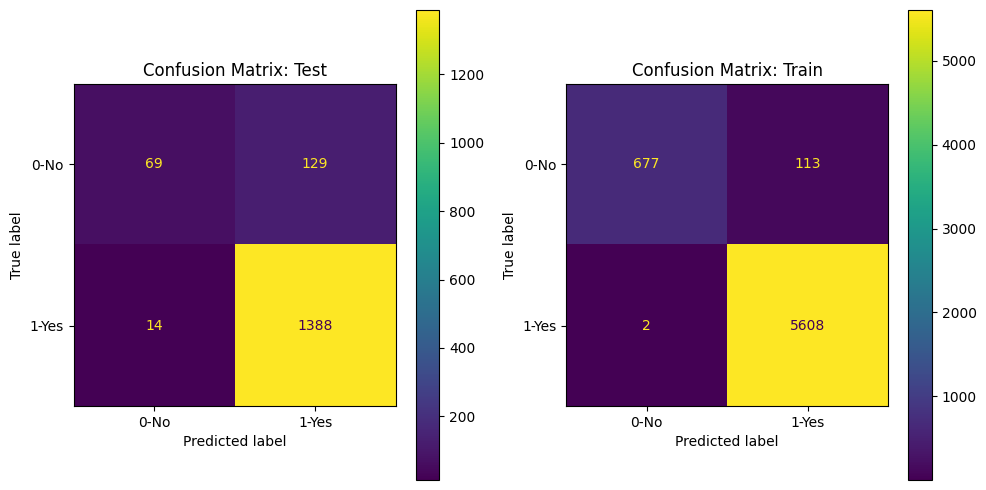

In [107]:
# create confusion matrices and plot using function
cm_test = confusion_matrix(y_test, y_pred_xgb)

y_pred_train_xgb = xgb_model.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train_xgb)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Confusion Matrix: Test', 'Confusion Matrix: Train'])

### <span style="color:#55c667ff">XGB Model 2

In [108]:
# create xgb model
xgb_model2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth=3, subsample=0.5)

# fit xgb model
xgb_model2.fit(X_train, y_train)

# Predict on test data
y_pred_xgb2 = xgb_model2.predict(X_test)

In [109]:
y_pred_proba_xgb2 = xgb_model2.predict_proba(X_test)[:, 1]

# F1 and AUC
auc_xgb2 = roc_auc_score(y_test, y_pred_proba_xgb2)
print(f'AUC score: {auc_xgb2: .2f} ')

f1_xgb2 = f1_score(y_test, y_pred_xgb2)
print(f'F1 score: {f1_xgb2: .2f} ')

AUC score:  0.83 
F1 score:  0.95 


In [110]:
eval_metric(xgb_model2, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[  74  124]
 [   9 1393]]
classification_report
              precision    recall  f1-score   support

           0       0.89      0.37      0.53       198
           1       0.92      0.99      0.95      1402

    accuracy                           0.92      1600
   macro avg       0.90      0.68      0.74      1600
weighted avg       0.91      0.92      0.90      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 429  361]
 [  10 5600]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       790
           1       0.94      1.00      0.97      5610

    accuracy                           0.94      6400
   macro avg       0.96      0.77      0.83      6400
weighted avg       0.94      0.94      0.93      6400



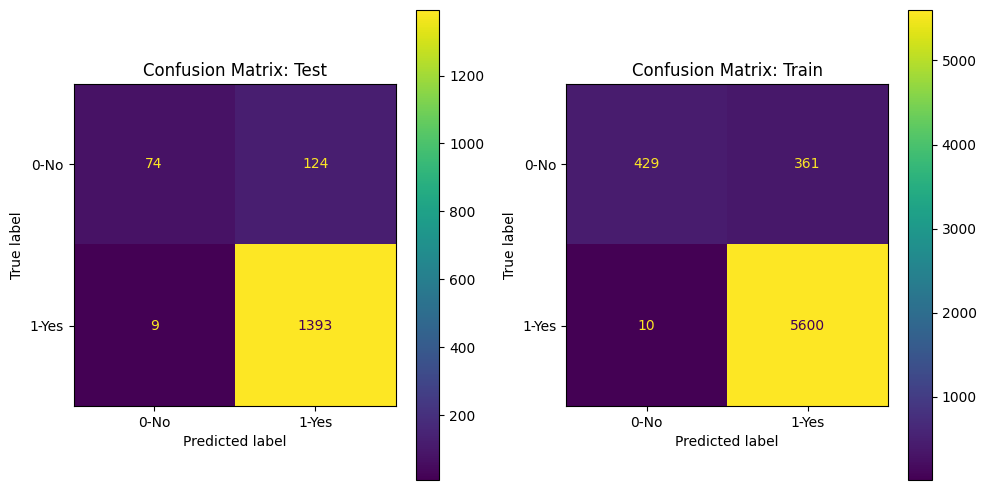

In [111]:
# create confusion matrices and plot using function
cm_test = confusion_matrix(y_test, y_pred_xgb2)

y_pred_train_xgb2 = xgb_model2.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train_xgb2)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Confusion Matrix: Test', 'Confusion Matrix: Train'])

Parameters tried:  
learning_rate: 0.47, 0.67, 0.97, 0.1, 0.15, 0.2  
max_depth: 2, 3, 5, 6, 7, 10, 20  
Best parameters for **XGBClassifier** resulted with learning_rate = 0.1 and max_depth = 3 with no overfitting and highest score of any model yet. This model will be added to the scores_df for later review.

In [112]:
# Storing model results in a dataframe for final evaluation of all models
scores_df6 = metric_df(xgb_model2, X_train, y_train, X_test, y_test, "XGBClassifier")

scores_df = pd.concat([scores_df, scores_df6], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM,Random Forest,AdaBoost,XGBClassifier
accuracy,0.75,0.88,0.84,0.91,0.90,0.92
precision,0.95,0.88,0.94,0.93,0.90,0.92
recall,0.76,0.99,0.87,0.98,0.99,0.99
f1,0.84,0.93,0.90,0.95,0.95,0.95
auc,0.78,0.59,NaN,0.81,0.82,0.83
True Negative Rate,0.09,0.01,0.07,0.06,0.03,0.05
False Positive Rate,0.03,0.12,0.05,0.07,0.09,0.08
False Negative Rate,0.21,0.01,0.11,0.02,0.01,0.01
True Positive Rate,0.66,0.87,0.76,0.85,0.87,0.87


## <span style="color:#287d8eff">5.2.7 CatBoost</span>

### <span style="color:#55c667ff">CatBoost with Default Parameters

CatBoost takes categorical variables directly. So, original data will be used for this model.

In [113]:
# creating copy of original dataframe to use for CatBoost
df = data.drop(columns=['AdSpend_Binned']).copy()
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.87,0.04,0.09,0,2.40,7.40,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.67,0.16,0.18,42,2.92,5.35,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.43,0.28,0.08,2,8.22,13.79,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.53,0.14,0.09,47,4.54,14.69,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.04,0.25,0.11,0,2.05,13.99,6,6,6,8,4345,1


In [114]:
# redefining X and y without encoding
X_cat = df.drop(['Conversion'], axis=1)
y_cat = df['Conversion']

# train test split without encoding
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

In [115]:
cat_cols = ['Gender', 'CampaignChannel', 'CampaignType']

In [116]:
# Initiate CatBoostClassifer
clf = CatBoostClassifier(auto_class_weights='Balanced',
                         iterations= 5,
                         learning_rate=0.1,
                         random_state=42)

# Fit Classifier to data
clf.fit(X_train_cat, y_train_cat,
        cat_features=cat_cols,
        eval_set= (X_test_cat, y_test_cat),
        verbose=False)

print('CatBoost model parameters')
print(clf.get_params())

CatBoost model parameters
{'iterations': 5, 'learning_rate': 0.1, 'auto_class_weights': 'Balanced', 'random_state': 42}


In [117]:
y_pred_cat = clf.predict(X_test_cat)
y_pred_proba_cat = clf.predict_proba(X_test_cat)[:,1]

# evaluate results
auc_cat = roc_auc_score(y_test_cat, y_pred_proba_cat)
print(f'AUC score: {auc_cat: .2f}')

f1_cat = f1_score(y_test_cat, y_pred_cat)
print(f'F1 score: {f1_cat: .2f} ')

AUC score:  0.80
F1 score:  0.87 


In [118]:
eval_metric(clf, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 141   53]
 [ 292 1114]]
classification_report
              precision    recall  f1-score   support

           0       0.33      0.73      0.45       194
           1       0.95      0.79      0.87      1406

    accuracy                           0.78      1600
   macro avg       0.64      0.76      0.66      1600
weighted avg       0.88      0.78      0.82      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 572  222]
 [1006 4600]]
classification_report
              precision    recall  f1-score   support

           0       0.36      0.72      0.48       794
           1       0.95      0.82      0.88      5606

    accuracy                           0.81      6400
   macro avg       0.66      0.77      0.68      6400
weighted avg       0.88      0.81      0.83      6400



**CatBoost** is not returning scores as high as other models. Results will be added to scores_df for comparison.

In [119]:
# Storing model results in a dataframe for final evaluation of all models
scores_df7 = metric_df(clf, X_train_cat, y_train_cat, X_test_cat, y_test_cat, "CatBoost")

scores_df = pd.concat([scores_df, scores_df7], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM,Random Forest,AdaBoost,XGBClassifier,CatBoost
accuracy,0.75,0.88,0.84,0.91,0.90,0.92,0.78
precision,0.95,0.88,0.94,0.93,0.90,0.92,0.95
recall,0.76,0.99,0.87,0.98,0.99,0.99,0.79
f1,0.84,0.93,0.90,0.95,0.95,0.95,0.87
auc,0.78,0.59,NaN,0.81,0.82,0.83,0.80
True Negative Rate,0.09,0.01,0.07,0.06,0.03,0.05,0.09
False Positive Rate,0.03,0.12,0.05,0.07,0.09,0.08,0.03
False Negative Rate,0.21,0.01,0.11,0.02,0.01,0.01,0.18
True Positive Rate,0.66,0.87,0.76,0.85,0.87,0.87,0.70


## <span style="color:#287d8eff">5.2.8 LightGBM</span>

### <span style="color:#55c667ff">LGBMClassifier Model 1

In [120]:
lgb_clf = LGBMClassifier(class_weight='balanced', random_state=42)

lgb_clf.fit(X_train, y_train)

y_pred_lgb = lgb_clf.predict(X_test)
y_pred_proba_lgb = lgb_clf.predict_proba(X_test)[:,1]

# evaluate results
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
print(f'AUC score: {auc_lgb: .2f}')

f1_lgb = f1_score(y_test, y_pred_lgb)
print(f'F1 score: {f1_lgb: .2f} ')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5610, number of negative: 790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
AUC score:  0.81
F1 score:  0.94 


In [121]:
eval_metric(lgb_clf, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 126   72]
 [ 103 1299]]
classification_report
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       198
           1       0.95      0.93      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.75      0.78      0.76      1600
weighted avg       0.90      0.89      0.89      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 779   11]
 [ 116 5494]]
classification_report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       790
           1       1.00      0.98      0.99      5610

    accuracy                           0.98      6400
   macro avg       0.93      0.98      0.96      6400
weighted avg       0.98      0.98      0.98      6400



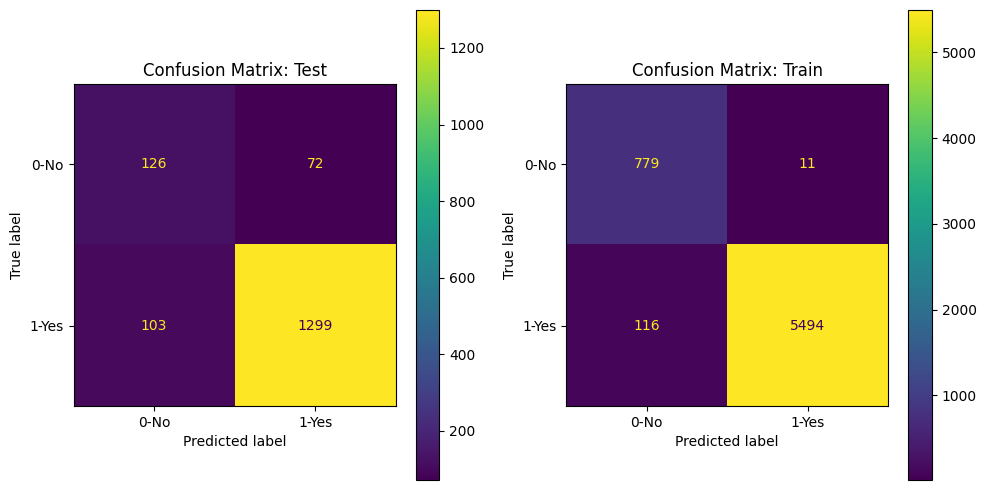

In [122]:
# create confusion matrices and plot using function
cm_test = confusion_matrix(y_test, y_pred_lgb)

y_pred_train_lgb = lgb_clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train_lgb)

plot_confusion_matrices(cm_test, cm_train, ['0-No','1-Yes'], ['Confusion Matrix: Test', 'Confusion Matrix: Train'])

First model provides scores comparable to some of the best scoring models. Model 2 will utilize manual parameter tuning to find best parameters. XGBoost is still the best model thus far.

### <span style="color:#55c667ff">LGBMClassifier Model 2

In [123]:
lgb2 = LGBMClassifier(class_weight='balanced',
                      learning_rate = 0.1,
                      num_iterations=100,
                      max_depth=3,
                      random_state=42)

lgb2.fit(X_train, y_train)

y_pred_lgb2 = lgb2.predict(X_test)
y_pred_proba_lgb2 = lgb2.predict_proba(X_test)[:,1]

# evaluate results
auc_lgb2 = roc_auc_score(y_test, y_pred_proba_lgb2)
print(f'AUC score: {auc_lgb2: .2f}')

f1_lgb2 = f1_score(y_test, y_pred_lgb2)
print(f'F1 score: {f1_lgb2: .2f} ')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5610, number of negative: 790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [124]:
eval_metric(lgb2, X_train, y_train, X_test, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[ 141   57]
 [ 219 1183]]
classification_report
              precision    recall  f1-score   support

           0       0.39      0.71      0.51       198
           1       0.95      0.84      0.90      1402

    accuracy                           0.83      1600
   macro avg       0.67      0.78      0.70      1600
weighted avg       0.88      0.83      0.85      1600


Train_Set
--------------------------------------
Confusion_matrix:
[[ 619  171]
 [ 724 4886]]
classification_report
              precision    recall  f1-score   support

           0       0.46      0.78      0.58       790
           1       0.97      0.87      0.92      5610

    accuracy                           0.86      6400
   macro avg       0.71      0.83      0.75      6400
weighted avg       0.90      0.86      0.87      6400



Neither LightGBM Model performs better than the XGBoost Model. Default LGBMClassifier model performs best and results will be added to scores_df for final review.





In [125]:
# Storing model results in a dataframe for final evaluation of all models
scores_df8 = metric_df(lgb_clf, X_train, y_train, X_test, y_test, "LGBMClassifier")

scores_df = pd.concat([scores_df, scores_df8], axis=1, ignore_index=False)

scores_df

,Logistic Regression,KNN,SVM,Random Forest,AdaBoost,XGBClassifier,CatBoost,LGBMClassifier
accuracy,0.75,0.88,0.84,0.91,0.90,0.92,0.78,0.89
precision,0.95,0.88,0.94,0.93,0.90,0.92,0.95,0.95
recall,0.76,0.99,0.87,0.98,0.99,0.99,0.79,0.93
f1,0.84,0.93,0.90,0.95,0.95,0.95,0.87,0.94
auc,0.78,0.59,NaN,0.81,0.82,0.83,0.80,0.81
True Negative Rate,0.09,0.01,0.07,0.06,0.03,0.05,0.09,0.08
False Positive Rate,0.03,0.12,0.05,0.07,0.09,0.08,0.03,0.04
False Negative Rate,0.21,0.01,0.11,0.02,0.01,0.01,0.18,0.06
True Positive Rate,0.66,0.87,0.76,0.85,0.87,0.87,0.70,0.81


## <span style="color:#287d8eff">5.2.9 Deep Learning ANN</span>

### <span style="color:#55c667ff"> Preprocessing

In [126]:
from tensorflow import keras

In [127]:
# defining metrics for model evaluation
metrics = [keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall')]

In [128]:
# count of classes
counts = np.bincount(y_train)
counts

array([ 790, 5610], dtype=int64)

In [129]:
# manually calculating class weights
weight_for_1 = 1 / counts[1] # weight for conversion == 1 (yes)
weight_for_0 = 1 / counts[0] # weight for conversion == 0 (no) <<< this is our nondominant class

# display weights
print(f"Weight for positive classes conversion == 1: {weight_for_1}")
print(f"Weight for negative class conversion == 0: {weight_for_0}")

Weight for positive classes conversion == 1: 0.00017825311942959
Weight for negative class conversion == 0: 0.0012658227848101266


In [130]:
# defining class weights
class_weights = {1: 0.00017825311942959, 0: 0.0012658227848101266}

In [131]:
weight_array = np.array([weight_for_0,weight_for_1])

### <span style="color:#55c667ff">ANN Model 1 - 3 Layers

In [167]:
# Create model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [168]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - fn: 205.0095 - fp: 510.2095 - loss: 0.4661 - precision: 0.8904 - recall: 0.9431 - val_fn: 0.0000e+00 - val_fp: 197.0000 - val_loss: 0.3252 - val_precision: 0.8768 - val_recall: 1.0000
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - fn: 9.1295 - fp: 357.0938 - loss: 0.3097 - precision: 0.8878 - recall: 0.9978 - val_fn: 18.0000 - val_fp: 172.0000 - val_loss: 0.3182 - val_precision: 0.8895 - val_recall: 0.9872
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - fn: 42.6881 - fp: 315.2339 - loss: 0.3088 - precision: 0.8958 - recall: 0.9843 - val_fn: 21.0000 - val_fp: 158.0000 - val_loss: 0.3150 - val_precision: 0.8973 - val_recall: 0.9850
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - fn: 45.0718 - fp: 277.6099 - loss: 0.2800 - precision: 0.9116 - recall: 0.9850 - val_fn: 29.0000 - val_fp: 155.0000 - val_loss: 0.3112 - val_precision: 0.8986 - val_recall: 0.9793
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - f

In [179]:
# Evaluate the model
y_pred_ann1 = model.predict(X_test_scaled)
y_pred_binary1 = (y_pred_ann1 > 0.5).astype(int)

ann1_f1 = f1_score(y_test, y_pred_binary1)
ann1_auc = roc_auc_score(y_test, y_pred_ann1)
false_pos_ann1 = history.history['val_fp'][-1]
false_neg_ann1 = history.history['val_fn'][-1]

print(f'F1 score: {ann1_f1: .2f}')
print(f'AUC score: {ann1_auc: .2f}')
print('False Positives for ANN Model 1:', false_pos_ann1)
print('False Negatives for ANN Model 1:', false_neg_ann1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
F1 score:  0.94
AUC score:  0.75
False Positives for ANN Model 1: 149.0
False Negatives for ANN Model 1: 32.0


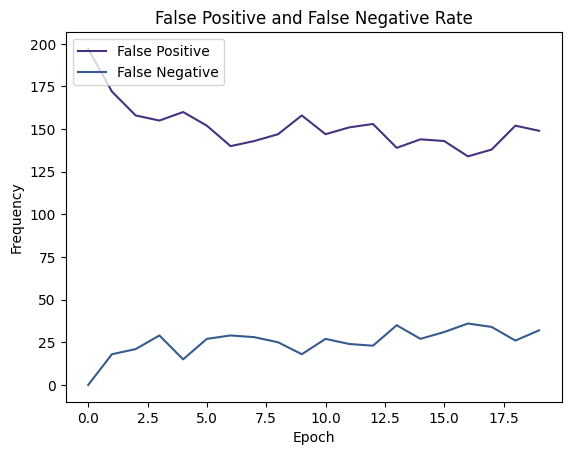

In [173]:
plt.plot(history.history['val_fp'])
plt.plot(history.history['val_fn'])
plt.title('False Positive and False Negative Rate')
plt.ylabel('Frequency')
plt.xlabel('Epoch')
plt.legend(['False Positive', 'False Negative'], loc='upper left')
plt.show()

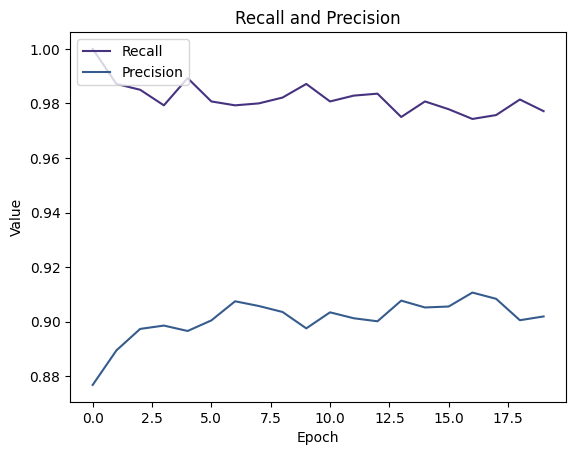

In [174]:
plt.plot(history.history['val_recall'])
plt.plot(history.history['val_precision'])
plt.title('Recall and Precision')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Recall', 'Precision'], loc='upper left')
plt.show()

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


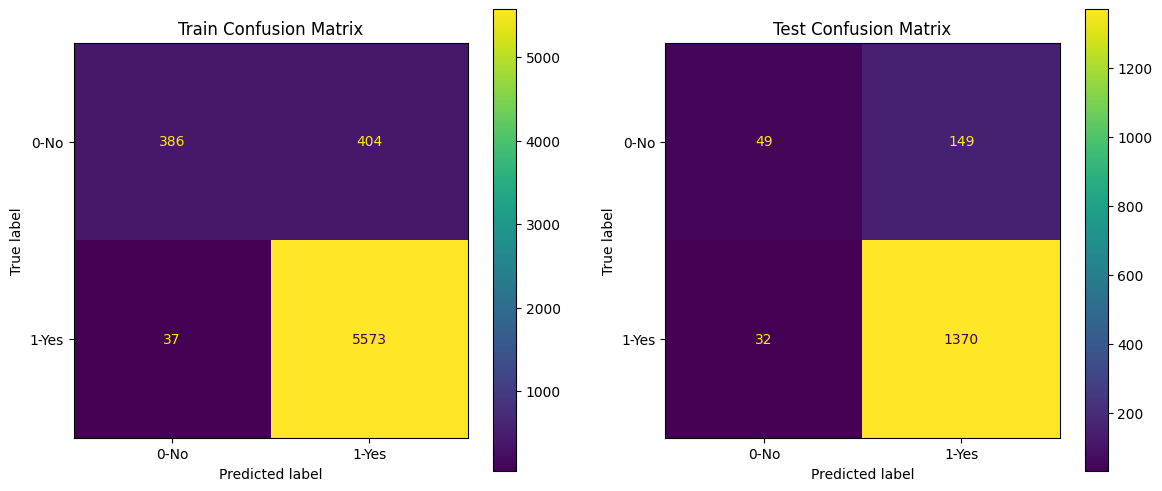

In [175]:
# Predict probabilities and convert to binary predictions for train and test sets
y_train_pred_prob = model.predict(X_train_scaled)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train Confusion Matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['0-No','1-Yes'])
disp_train.plot(cmap=plt.cm.viridis, ax=axes[0])
axes[0].set_title('Train Confusion Matrix')

# Test Confusion Matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['0-No','1-Yes'])
disp_test.plot(cmap=plt.cm.viridis, ax=axes[1])
axes[1].set_title('Test Confusion Matrix')

plt.show()

**ANN Model 1** is not performing as well as the XGBoost Model. With lower F1 and significantly lower AUC scores. This does not provide a good balance of differentiating between classes. 

### <span style="color:#55c667ff">ANN Model 2 - 4 Layers

In [176]:
# Create model
model2 = Sequential()

# Add input layer
model2.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add hidden layers
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))

# Add output layer
model2.add(Dense(units=1, activation='sigmoid'))

# Compile model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [177]:
# Train the model
history2 = model2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - fn: 298.7536 - fp: 491.6715 - loss: 0.4959 - precision: 0.8922 - recall: 0.9183 - val_fn: 0.0000e+00 - val_fp: 198.0000 - val_loss: 0.3293 - val_precision: 0.8763 - val_recall: 1.0000
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - fn: 5.5981 - fp: 385.4486 - loss: 0.3032 - precision: 0.8839 - recall: 0.9987 - val_fn: 8.0000 - val_fp: 172.0000 - val_loss: 0.3235 - val_precision: 0.8902 - val_recall: 0.9943
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - fn: 33.3246 - fp: 315.0351 - loss: 0.2909 - precision: 0.9007 - recall: 0.9896 - val_fn: 20.0000 - val_fp: 161.0000 - val_loss: 0.3162 - val_precision: 0.8957 - val_recall: 0.9857
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - fn: 50.6038 - fp: 275.4198 - loss: 0.2775 - precision: 0.9094 - recall: 0.9825 - val_fn: 31.0000 - val_fp: 146.0000 - val_loss: 0.3121 - val_precision: 0.9038 - val_recall: 0.9779
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - fn: 

In [178]:
# Evaluate the model
y_pred_ann2 = model2.predict(X_test_scaled)
y_pred_binary2 = (y_pred_ann2 > 0.5).astype(int)

ann2_f1 = f1_score(y_test, y_pred_binary2)
ann2_auc = roc_auc_score(y_test, y_pred_ann2)

false_pos_ann2 = history2.history['val_fp'][-1]
false_neg_ann2 = history2.history['val_fn'][-1]

print(f'F1 score: {ann1_f1: .2f}')
print(f'AUC score: {ann1_auc: .2f}')
print('False Positives for ANN Model 2:', false_pos_ann2)
print('False Negatives for ANN Model 2:', false_neg_ann2)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
F1 score:  0.94
AUC score:  0.75
False Positives for ANN Model 2: 153.0
False Negatives for ANN Model 2: 16.0


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


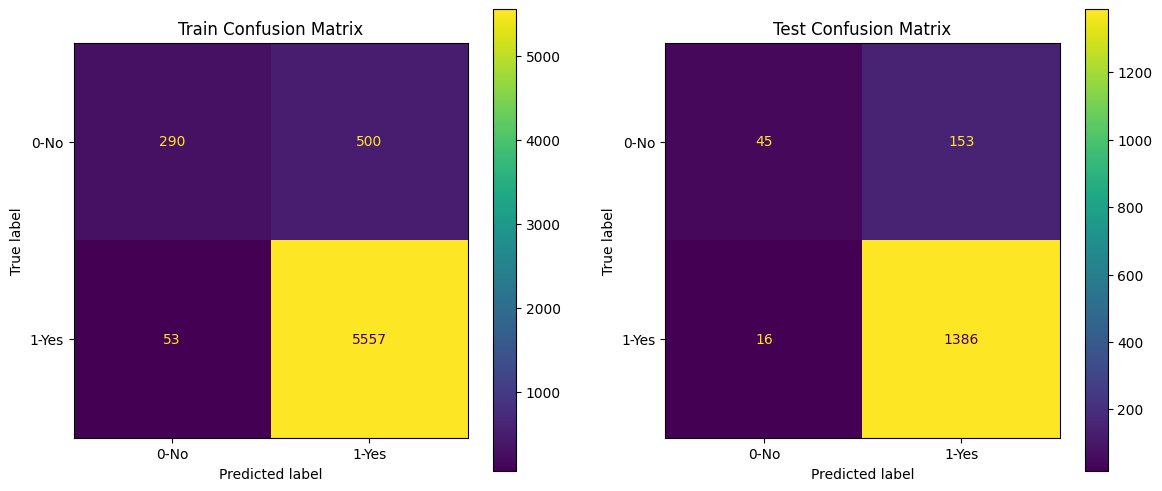

In [181]:
# Predict probabilities and convert to binary predictions for train and test sets
y_train_pred_prob = model2.predict(X_train_scaled)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

y_test_pred_prob = model2.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train Confusion Matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['0-No','1-Yes'])
disp_train.plot(cmap=plt.cm.viridis, ax=axes[0])
axes[0].set_title('Train Confusion Matrix')

# Test Confusion Matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['0-No','1-Yes'])
disp_test.plot(cmap=plt.cm.viridis, ax=axes[1])
axes[1].set_title('Test Confusion Matrix')

plt.show()

Neither of the ANN models performs as well as the XGBClassifier model.

In [183]:
scores_df

,Logistic Regression,KNN,SVM,Random Forest,AdaBoost,XGBClassifier,CatBoost,LGBMClassifier
accuracy,0.75,0.88,0.84,0.91,0.90,0.92,0.78,0.89
precision,0.95,0.88,0.94,0.93,0.90,0.92,0.95,0.95
recall,0.76,0.99,0.87,0.98,0.99,0.99,0.79,0.93
f1,0.84,0.93,0.90,0.95,0.95,0.95,0.87,0.94
auc,0.78,0.59,NaN,0.81,0.82,0.83,0.80,0.81
True Negative Rate,0.09,0.01,0.07,0.06,0.03,0.05,0.09,0.08
False Positive Rate,0.03,0.12,0.05,0.07,0.09,0.08,0.03,0.04
False Negative Rate,0.21,0.01,0.11,0.02,0.01,0.01,0.18,0.06
True Positive Rate,0.66,0.87,0.76,0.85,0.87,0.87,0.70,0.81


# <span style="color:#29AF7FFF">6. Final Model Comparisons</span>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287d8eff">6.1 Visualizing Model Performance Metrics</span>

In [184]:
# Plotting Model Results for Comparison
scores_df.sort_values(by="f1", axis=1, ascending=False)

,XGBClassifier,Random Forest,AdaBoost,LGBMClassifier,KNN,SVM,CatBoost,Logistic Regression
accuracy,0.92,0.91,0.90,0.89,0.88,0.84,0.78,0.75
precision,0.92,0.93,0.90,0.95,0.88,0.94,0.95,0.95
recall,0.99,0.98,0.99,0.93,0.99,0.87,0.79,0.76
f1,0.95,0.95,0.95,0.94,0.93,0.90,0.87,0.84
auc,0.83,0.81,0.82,0.81,0.59,NaN,0.80,0.78
True Negative Rate,0.05,0.06,0.03,0.08,0.01,0.07,0.09,0.09
False Positive Rate,0.08,0.07,0.09,0.04,0.12,0.05,0.03,0.03
False Negative Rate,0.01,0.02,0.01,0.06,0.01,0.11,0.18,0.21
True Positive Rate,0.87,0.85,0.87,0.81,0.87,0.76,0.70,0.66


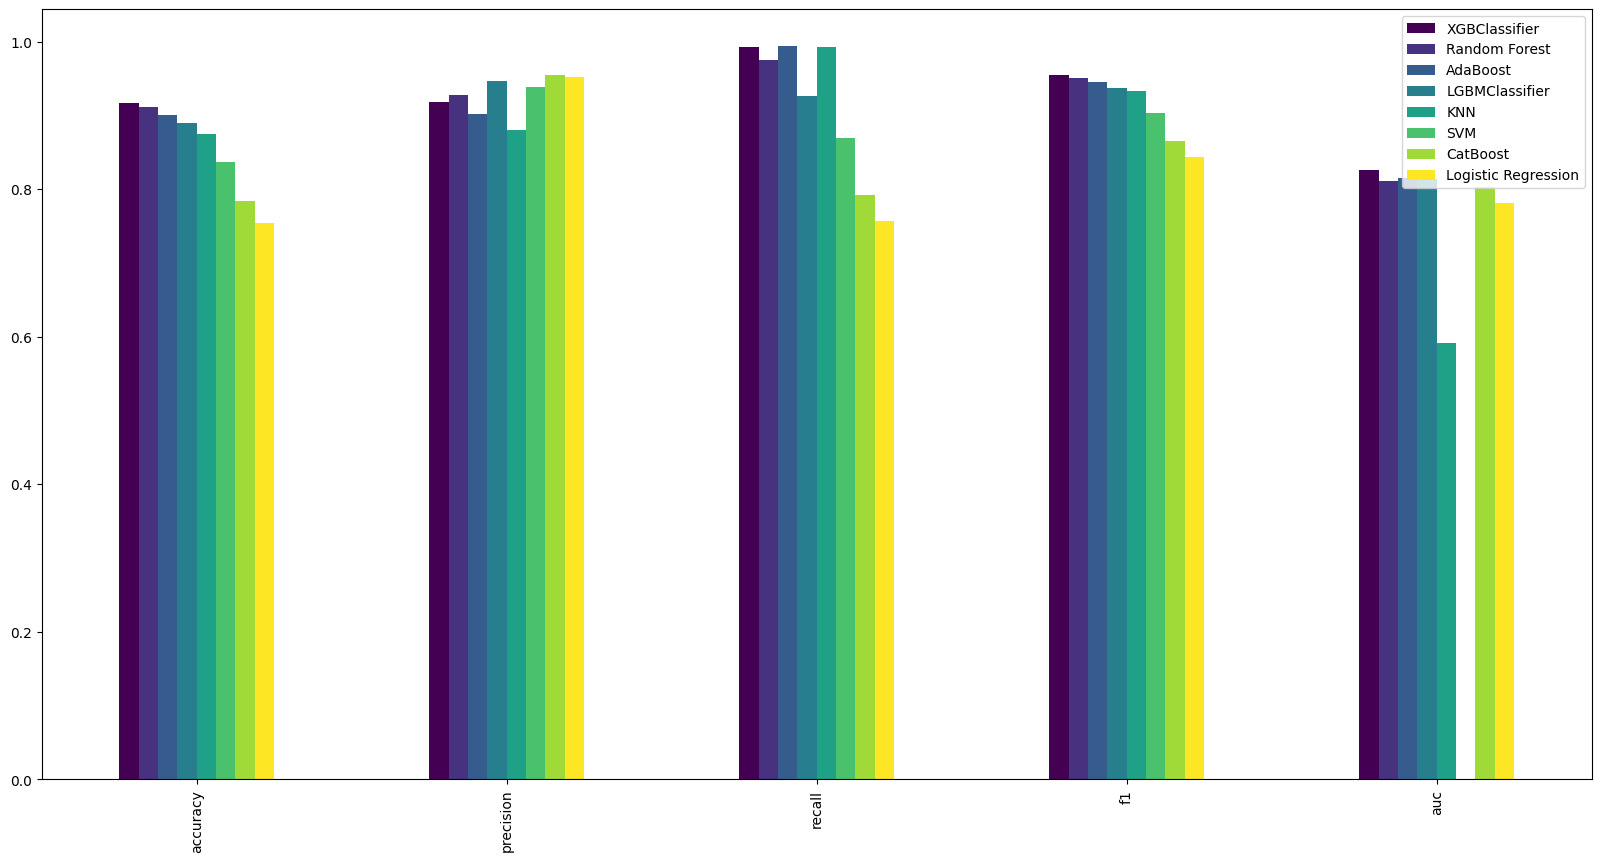

In [185]:
scores_df[:5].sort_values(by='f1', axis=1, ascending=False).plot.bar(figsize = (20,10), cmap="viridis")
plt.legend(loc="upper right")
plt.show()

When considering all evaluation metrics, we can see that the XGBClassifier is the best performing model. While some metrics perform lower than other models (precision and AUC), the XGB model provides the most balanced outcomes scoring high across all metrics. F1 is the score being used to determine best model because of the highly imbalanced classes.

### <span style="color:#55c667ff">Comparing F1 Scores

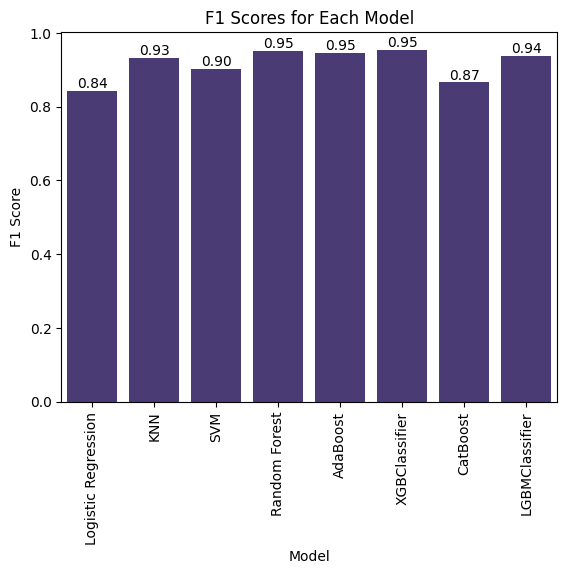

In [186]:
f1_scores = scores_df.loc['f1']
sns.barplot(x=f1_scores.index, y=f1_scores.values)
plt.title('F1 Scores for Each Model')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
bar_labels = [f'{value:.2f}' for value in f1_scores]
plt.bar_label(plt.gca().containers[0], labels=bar_labels)
plt.show()

Here we can see that there are three models with F1 score of 0.95. However, when considering other metrics such as AUC, XGBClassifier is the clear winner. Let's take a look at how the various models AUC scores compare.

### <span style="color:#55c667ff">Comparing AUC Scores

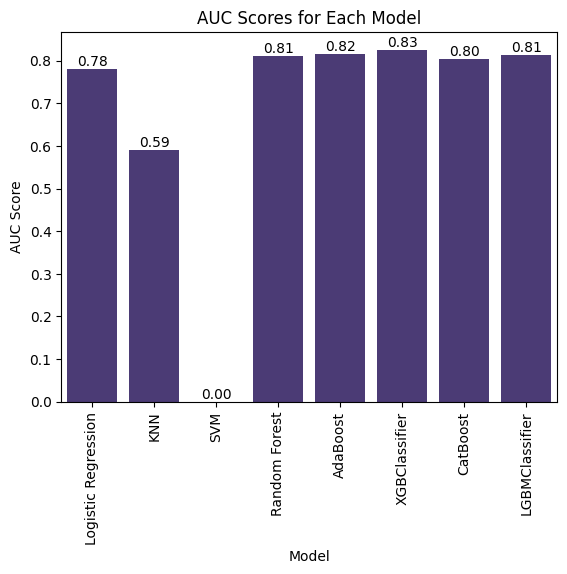

In [187]:
auc_scores = scores_df.loc['auc']
auc_scores = auc_scores.fillna(0)
ax = sns.barplot(x=auc_scores.index, y=auc_scores.values)
plt.title('AUC Scores for Each Model')
plt.xlabel('Model')
bar_labels = [f'{value:.2f}' for value in auc_scores]
ax.bar_label(ax.containers[0], labels=bar_labels)
plt.xticks(rotation=90)
plt.ylabel('AUC Score')

plt.show()

Here we can see that the Random Forest, AdaBoost, and XGBClassifiers have different AUC scores. XGBClassifier model provides the best AUC score of 0.83. We can futher confirm that XGBClassifier is the best model based on accuracy score.

### <span style="color:#55c667ff">Comparing Accuracy

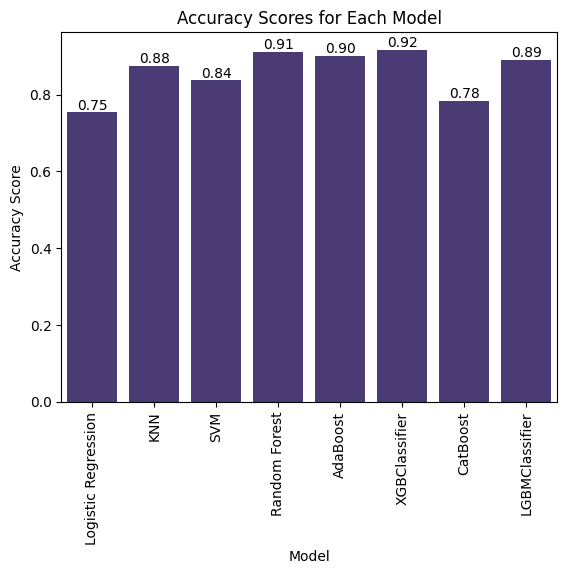

In [188]:
accuracy = scores_df.loc['accuracy']
ax = sns.barplot(x=accuracy.index, y=accuracy.values)
plt.title('Accuracy Scores for Each Model')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
bar_labels = [f'{value:.2f}' for value in accuracy]
ax.bar_label(ax.containers[0], labels=bar_labels)
plt.show()

We can again see evidence that the XGBoost Model is providing the best scoring and most balanced model with the ability to distinguish between classes and provide highly accurate predictions. This will allow us to identify those consumers and campaigns which are least likely to produce a positive conversion. We can start by creating targeted Conversion campaigns for this group of consumers as well as modifying the Campaign Channels and types to increase Conversion and reduce AdSpend loss.

# <span style="color:#29AF7FFF">7. Evaluating Feature Importance</span>
Now that we have identified the best model we will look at the feature importance of this model.

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

### <span style="color:#55c667ff">Visualizing Feature Importance

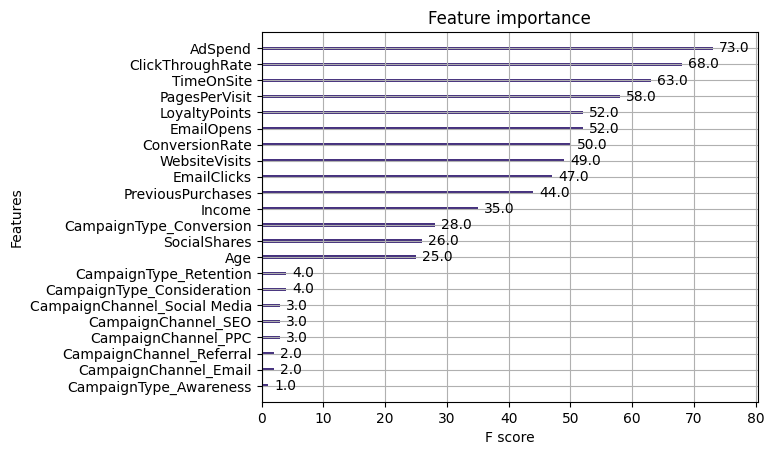

In [189]:
from xgboost import plot_importance

plot_importance(xgb_model2)
plt.show()

### <span style="color:#55c667ff">Running XGBClassifier based on Feature Importance  
Now that we know we have some features that are more important than others, can we create an even better model using less features?

In [190]:
from sklearn.feature_selection import SelectFromModel

# Make Predictions for Test data
y_pred = xgb_model2.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = np.sort(xgb_model2.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model2, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(learning_rate = 0.1, max_depth=3, subsample=0.5)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 91.69%
Thresh=0.000, n=24, Accuracy: 91.69%
Thresh=0.000, n=24, Accuracy: 91.69%
Thresh=0.021, n=22, Accuracy: 91.69%
Thresh=0.023, n=21, Accuracy: 91.94%
Thresh=0.023, n=20, Accuracy: 91.94%
Thresh=0.024, n=19, Accuracy: 92.06%
Thresh=0.025, n=18, Accuracy: 92.06%
Thresh=0.026, n=17, Accuracy: 91.88%
Thresh=0.026, n=16, Accuracy: 92.25%
Thresh=0.026, n=15, Accuracy: 92.25%
Thresh=0.037, n=14, Accuracy: 92.12%
Thresh=0.038, n=13, Accuracy: 92.00%
Thresh=0.043, n=12, Accuracy: 92.19%
Thresh=0.051, n=11, Accuracy: 92.06%
Thresh=0.058, n=10, Accuracy: 91.44%
Thresh=0.058, n=9, Accuracy: 89.25%
Thresh=0.059, n=8, Accuracy: 88.81%
Thresh=0.061, n=7, Accuracy: 88.62%
Thresh=0.062, n=6, Accuracy: 87.62%
Thresh=0.062, n=5, Accuracy: 87.06%
Thresh=0.064, n=4, Accuracy: 87.56%
Thresh=0.065, n=3, Accuracy: 87.69%
Thresh=0.069, n=2, Accuracy: 87.62%
Thresh=0.080, n=1, Accuracy: 87.62%


While reducing features does not significantly increase accuracy for the model, it will simplify the model and reduce computational expense. Therefore, a final model will be created with a threshold of 0.026 where number of features is 15.

# <span style="color:#29AF7FFF">8. Creating the Final Model</span>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

### <span style="color:#55c667ff">Creating the final model with 15 features

In [191]:
# Setting the threshold for optimal features = 15
optimal_thresh = 0.026
selection = SelectFromModel(xgb_model2, threshold=optimal_thresh, prefit=True)

# Transform train and test sets to retain only 15 features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# Train the final model
final_model = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5)
final_model.fit(select_X_train, y_train)

# Evaluate the final model
y_pred_final = final_model.predict(select_X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Model Accuracy: %.2f%%" % (final_accuracy * 100.0))
final_f1 = f1_score(y_test, y_pred_final)
print("Final Model F1 Score: %.2f%%" % (final_f1 * 100.0))
y_pred_proba_final = final_model.predict_proba(select_X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred_proba_final)
print("Final Model AUC Score: %.2f%%" % (final_auc * 100.0))

Final Model Accuracy: 92.25%
Final Model F1 Score: 95.74%
Final Model AUC Score: 82.39%


In [192]:
selected_features = X_train.columns[selection.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens',
       'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')


# <span style="color:#29AF7FFF">9. Pickle the Final Model</span>
Save the final model for future deployment:

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

In [193]:
filename = 'predict_conversion_final.pkl'

with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f'Model saved to {filename}')

Model saved to predict_conversion_final.pkl


# <span style="color:#29AF7FFF">10. Conclusion</span>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#d9dddc" data-toggle="popover">Content</a>

## <span style="color:#287d8eff">Summary of Findings</span>
During the exploratory data analysis, we discovered that, on average, those customers visiting the website more times, viewing more pages, and overall spending more time on the website are more likely to result in a conversion. So, we should examine the advertising campaign types and channels to determine the key features of each type/channel to see if we can apply the more successful features to less successful campaigns. Campaigns in the Conversion category are the most successful. With the information we gathered, it is clear that the Awareness Campaigns are our least successful campaigns leading to the most AdSpend Loss. Marketing should consider the viability of these campaigns as a whole to determine if there are better methods which would lead to positive conversion.

## <span style="color:#287d8eff">Predicting Conversion</span>
The tuned XBGClassifier model provided the best model overall for predicting Conversion with an accuracy of 92.25, f1 score of 95.74, and auc of 82.39, this model provides a robust and balanced approach to predicting Conversions. With this ability, we can perhaps increase the amount of Conversion campaigns that are being offered to those that are least likely to result in conversion since our Conversion campaigns have the highest likelihood of resulting in conversion.

......